In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# PART 1: DATA ACQUISITION AND EXTRACTION

## 1. Data Acquisition

### Connecting to Database

In [2]:
connection = mysql.connector.connect (host = 'localhost',
                                     user = 'root',
                                     passwd = 'DatabaseRoot3306.',
                                     db = 'papers')

In [3]:
connection

### Tables in the database

- List of tables

In [4]:
papers_tables = pd.read_sql_query('SHOW TABLES FROM papers', connection)
print(papers_tables)

  Tables_in_papers
0            issue
1          journal


- Tables description

In [5]:
tables = papers_tables['Tables_in_papers']

In [6]:
for table_names in tables:
    desc = pd.read_sql_query('DESCRIBE {}'.format(table_names), connection)
    print(table_names)
    print(desc, '\n')

issue
                  Field             Type Null  Key Default           Extra
0              issue_id           b'int'   NO  PRI    None  auto_increment
1               user_id   b'varchar(30)'   NO  MUL    None                
2                volume           b'int'  YES         None                
3          issue_number           b'int'  YES         None                
4                  year           b'int'  YES         None                
5           cover_image  b'varchar(200)'  YES         None                
6   reviewers_list_file  b'varchar(200)'  YES         None                
7         special_issue    b'tinyint(1)'   NO         b'0'                
8                status    b'tinyint(1)'   NO         b'1'                
9          date_publish      b'datetime'   NO         None                
10           date_input      b'datetime'  YES         None                
11          date_update      b'datetime'  YES         None                 

journal
         

### Declaring tables into variables

In [7]:
issue_table = pd.read_sql_query('SELECT * FROM issue', connection)

In [8]:
journal_table = pd.read_sql_query('SELECT * FROM journal', connection)

### Showing both tables

In [9]:
print(len(issue_table.index))
issue_table

55


,issue_id,user_id,volume,issue_number,year,cover_image,reviewers_list_file,special_issue,status,date_publish,date_input,date_update
0,3,4dm1n,1,1,2010,None,None,0,0,2014-01-17 10:04:29,2017-03-25 11:37:39,2019-03-04 13:06:05
1,4,4dm1n,2,1,2011,None,None,0,0,2014-01-17 10:15:53,2017-03-25 11:38:02,2019-03-04 13:06:30
2,5,4dm1n,2,2,2011,None,None,0,0,2014-01-17 10:25:37,2017-03-25 11:38:21,2019-03-04 13:06:43
3,6,4dm1n,2,3,2011,None,None,0,0,2014-01-17 10:35:20,2017-03-25 11:38:43,2019-03-04 13:07:14
4,7,secretariatijtech,3,1,2012,None,None,0,0,2014-01-17 11:05:47,2017-03-26 15:24:48,2019-03-04 13:08:04
5,8,secretariatijtech,3,2,2012,None,None,0,0,2014-01-17 10:50:29,2017-03-26 15:25:06,2019-03-04 13:07:37
6,9,secretariatijtech,4,1,2013,None,None,0,0,2014-01-17 13:07:08,2017-03-26 15:25:25,2019-03-04 13:09:54
7,10,secretariatijtech,4,2,2013,None,None,0,0,2014-01-17 11:27:18,2017-03-26 15:25:48,2019-03-04 13:09:35
8,11,secretariatijtech,4,3,2013,None,None,0,0,2014-01-17 11:15:21,2017-03-26 15:26:06,2019-03-04 13:09:17
9,12,secretariatijtech,5,1,2014,None,None,0,0,2014-01-27 14:28:01,2017-03-26 15:26:23,2019-03-01 14:28:01


In [10]:
print(len(journal_table.index))
journal_table

1025


,journal_id,sub_id,issue_id,title,keywords,abstract,introduction,experimental_method,result,conclusion,...,download,doi_url,cite,date_submit,date_revise,date_accept,date_publish,erratum_file,erratum_type,erratum_date
0,1,37,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,,...,1012,https://doi.org/10.14716/ijtech.v8i1.7628,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06 00:00:00,NaT,2016-11-17,2017-01-31 00:00:00,None,None,2020-10-05 16:45:48
1,2,38,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">During the yeast fermentati...","<p align=""justify"">Bioethanol production from ...",...,895,https://doi.org/10.14716/ijtech.v8i1.3948,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20 00:00:00,NaT,2017-01-01,2017-01-31 00:00:00,None,None,2020-10-05 16:31:56
2,4,40,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The model parameters were a...","<p align=""justify"">The temperature had an infl...",...,813,https://doi.org/10.14716/ijtech.v8i1.3233,"Mirwan, A., SusiantoAltway, A., & Handogo, R. ...",2016-02-18 00:00:00,NaT,2017-01-01,2017-01-31 00:00:00,None,None,2020-10-12 02:21:45
3,8,44,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...","<p class=""MsoNormal"" style=""text-align: justif...",...,544,https://doi.org/10.14716/ijtech.v9i1.44,"Sadighi, S., Mohaddecy, S.R.S., Abbasi, A., 20...",2017-08-09 00:00:00,NaT,2018-01-04,2018-01-27 00:00:00,None,None,2020-10-05 16:19:06
4,11,63,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin: 0pt 0pt 0....","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",...,787,https://doi.org/10.14716/ijtech.v8i2.6130,"Seva, R., 2017. Designing a Call Center Traini...",2016-10-21 00:00:00,NaT,2017-01-17,2017-04-29 00:00:00,None,None,2020-10-12 02:30:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,4039,64,Edible Coating for Beef Preservation from Chit...,"Chitosan, Edible coating, Liquid smoke, Rice h...","<p class=""AbstracttitleDERJournal"" style=""marg...","<div class=""WordSection1"" style=""line-height: ...",None,,"<p class=""MsoNormal"" style=""text-align: justif...",...,5,https://doi.org/10.14716/ijtech.v11i4.4039,"<font face=""Arial"">Desvita, H., Faisal, M., Ma...",2020-04-17 10:32:26,2020-05-29 12:00:42,NaT,2020-10-16 18:36:52,None,Corrigendum,2020-10-17 12:12:49
1021,1091,4083,64,Curing Characteristics and Physical Properties...,Clay; Dodecylamine; Modified clay; Natural rub...,"<p class=""AbstracttitleDERJournal"" style=""marg...","<p class=""MsoNormal"" style=""text-align: justif...",None,,"<p class=""MsoNormal"" style=""text-align: justif...",...,3,https://doi.org/10.14716/ijtech.v11i4.4083,"<font face=""Arial"">Hasan, A., Aznury, M., Purn...",2020-05-01 16:09:26,2020-05-03 22:17:01,NaT,2020-10-16 18:37:11,None,Corrigendum,2020-10-17 12:13:02
1022,1092,4162,64,Utilization of Dammar-Gum as a Soft Template i...,Dammar-gum; Photocatalyst; Soft template; Tita...,"<p class=""AbstracttitleDERJourn

# 2. Data Preprocessing

## Removing HTML Tags

In [18]:
import re as re

In [12]:
def html_to_str(string):
    result = re.sub('<.*?>','',string)
    return result

In [13]:
conv = lambda i : i or '' 

In [14]:
journal_table['abstract'] = [conv(i) for i in journal_table['abstract']] 
journal_table['introduction'] = [conv(i) for i in journal_table['introduction']] 
journal_table['experimental_method'] = [conv(i) for i in journal_table['experimental_method']] 
journal_table['conclusion'] = [conv(i) for i in journal_table['conclusion']] 
journal_table['acknowledgement'] = [conv(i) for i in journal_table['acknowledgement']] 
journal_table['references'] = [conv(i) for i in journal_table['references']] 
journal_table['result'] = [conv(i) for i in journal_table['result']] 

In [21]:
journal_table['abstract_str']=journal_table['abstract'].apply(lambda cw : html_to_str(cw))
journal_table['introduction_str']=journal_table['introduction'].apply(lambda cw : html_to_str(cw))
journal_table['experimental_method_str']=journal_table['experimental_method'].apply(lambda cw : html_to_str(cw))
journal_table['conclusion_str']=journal_table['conclusion'].apply(lambda cw : html_to_str(cw))
journal_table['acknowledgement_str']=journal_table['acknowledgement'].apply(lambda cw : html_to_str(cw))
journal_table['references_str']=journal_table['references'].apply(lambda cw : html_to_str(cw))

In [22]:
journal_table['result_str']=journal_table['result'].apply(lambda cw : html_to_str(cw))

In [23]:
journal_table[1024:]

journal_id  sub_id  issue_id  \
1024        1094    2852        64   

                                                                                title  \
1024  Yaw Motion Stability of an Indonesian Ro-Ro Ferry in Adverse Weather Conditions   

                                                keywords  \
1024  Limit cycles; Maneuvering; Ro-ro ferry; Yaw motion   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           abstract  \
1024  <p class="AbstracttitleDERJournal" style="margin-top: 0in; text-align: justify; line-height: 1.6;"><span lang="DE" style=""><font face="Arial"><span style="font-size: 14px;">The yaw motion stability and\r\ncourse-keeping ability of ships are important factors with regard to collision\r\ndanger, particularly for ships operating in narrow channels, crowded routes, or\r\nport areas. Yaw motion may become unstable due to external forces, such as\r\nwind. To investigate yaw stability and course-keeping ability, this study\r\ndeveloped a nonlinear dynamic system of a three-degree-of-freedom mathematical\r\nmodel to determine steady state equilibrium. Yaw motion behavior was then\r\nanalyzed using the eigenvalue characteristic of the obtained equilibrium\r\npoints. The numerical results for an Indonesian ro-ro ferry showed that the\r\nrudder angle required to maintain the ship’s course tended to increase as wind\r\nvelocity increased. In beam wind, the necessary rudder angle was larger than\r\nthe maximum possible rudder angle when the wind velocity was 24 m/s or more.\r\nThe ship could be controlled by the rudder during operation, but its yaw motion\r\ntended to be unstable in following wind. The stable oscillation of yaw motion\r\noccurs when the wind velocity is higher than 11 m/s, and the range of heading\r\nand rudder angles increases as wind velocity increases.</span></font><font face="Cambria, serif"><o:p></o:p></font></span></p>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [19]:
pd.set_option('display.max_colwidth', None)

### Adding citing column as DV

In [18]:
citing = [2,58,2,4,1,2,2,10,0,0,0,0,4,7,1,2,5,2,1,0,0,3,4,4,0,3,11,2,1,8,6,3,5,3,6,1,0,4,3,0,8,11,3,14,1,0,3,1,0,17,4,3,
4,4,9,9,12,1,0,2,5,0,9,6,6,30,8,5,4,3,5,7,8,8,7,11,15,3,0,3,6,0,12,0,1,7,5,2,1,7,8,3,3,3,2,2,1,0,1,3,4,1,0,6,0,6,5,7,10,
3,2,9,5,9,2,3,13,20,1,1,0,1,0,8,2,4,14,10,6,22,4,1,6,8,2,6,0,4,7,5,6,4,8,7,1,9,5,0,7,2,6,6,1,2,17,8,2,1,9,4,2,9,0,2,4,0,10,
5,3,6,4,0,2,5,3,3,15,3,0,2,2,5,0,5,0,0,5,13,11,46,3,14,12,1,2,18,0,0,7,0,11,11,0,1,24,2,0,0,3,2,5,7,1,6,1,0,12,2,0,17,8,23,
1,6,0,4,0,10,0,1,21,14,10,5,6,17,13,0,0,12,3,0,5,1,10,4,12,2,0,0,0,3,3,6,1,2,4,1,4,11,13,22,7,5,0,9,1,4,6,9,6,7,2,3,2,2,
1,9,0,2,2,17,4,1,1,0,12,5,6,4,3,3,4,2,7,1,5,1,4,12,2,2,3,8,0,3,6,0,2,2,8,3,1,1,3,2,0,0,1,1,7,2,8,3,5,7,0,0,0,2,4,4,10,4,
16,2,4,4,3,13,3,9,7,9,1,6,0,0,0,3,4,11,9,0,21,25,3,6,8,10,4,3,1,14,1,17,25,8,3,13,20,17,15,0,6,0,9,3,2,0,4,1,8,7,4,7,2,
0,2,2,23,9,13,3,11,13,7,4,1,7,3,0,1,10,8,3,4,11,0,12,1,1,2,18,0,9,2,11,10,3,1,12,11,2,5,22,4,4,1,1,5,2,16,1,0,6,2,1,3,8,
8,7,3,21,8,13,12,2,12,8,0,10,20,4,9,13,0,0,3,5,5,5,7,9,5,11,3,7,9,12,1,4,10,9,3,3,13,1,5,2,1,2,2,0,6,0,2,2,3,3,0,9,2,5,11,
9,4,0,3,0,1,1,3,4,32,0,4,7,1,1,2,7,3,9,4,5,3,7,8,7,16,14,7,8,8,1,2,3,4,1,2,0,1,7,0,2,0,4,2,7,1,2,22,3,3,2,14,0,7,2,9,2,
3,0,4,2,12,11,12,1,12,3,0,13,0,19,0,4,11,2,9,10,20,1,0,3,0,0,0,2,0,3,5,1,3,2,2,3,10,2,9,2,1,1,3,3,3,25,3,2,16,12,9,1,4,
6,6,5,3,2,7,4,1,8,14,0,2,1,2,27,6,4,0,2,1,8,8,2,6,3,3,6,2,3,4,1,1,0,0,6,0,6,3,7,9,4,1,3,1,8,9,11,2,3,5,4,9,4,3,3,9,8,2,
1,2,4,4,9,12,0,1,6,2,2,6,4,8,0,0,0,6,2,7,7,5,1,6,2,0,6,1,1,2,2,6,15,13,2,1,1,33,5,1,0,0,0,0,2,1,1,2,1,4,4,4,6,1,8,1,2,2,
0,0,5,1,1,2,7,1,2,0,2,2,1,1,1,9,5,1,2,7,3,2,4,4,4,1,2,2,4,2,3,2,1,1,4,4,3,3,0,4,2,3,3,0,4,2,0,1,7,3,0,2,2,2,0,3,0,3,0,3,
0,6,1,6,2,3,3,7,0,1,0,0,0,3,0,4,1,6,1,3,16,2,3,0,0,1,3,5,12,2,2,0,1,2,1,0,2,0,0,1,2,3,0,2,8,6,0,0,0,1,0,1,3,0,0,0,1,8,5,
3,0,0,0,5,2,0,0,0,1,2,7,0,0,0,0,2,0,0,0,0,1,2,0,0,2,0,1,2,1,2,0,0,0,3,0,1,0,0,1,1,4,1,5,4,0,1,2,0,1,2,0,1,0,1,1,0,2,0,0,0,
1,2,1,0,2,2,1,3,0,0,0,0,0,1,0,7,0,1,0,4,0,0,0,1,0,0,2,0,0,2,0,1,1,1,2,1,1,0,0,0,0,2,0,0,0,4,0,1,1,0,2,0,4,1,0,0,1,1,3,0,
0,3,1,1,1,0,0,0,1,1,0,0,0,0,0,4,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0]

In [19]:
journal_table['citing'] = citing

In [20]:
journal_table['citing'].describe()

count    1025.000000
mean        4.050732
std         5.280359
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        58.000000
Name: citing, dtype: float64

In [21]:
journal_table['citing_q2th'] = [1 if i>=2 else 0 for i in journal_table.citing]

In [22]:
journal_table

,journal_id,sub_id,issue_id,title,keywords,abstract,introduction,experimental_method,result,conclusion,...,erratum_date,abstract_str,introduction_str,experimental_method_str,conclusion_str,acknowledgement_str,references_str,result_str,citing,citing_q2th
0,1,37,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",,,,,...,2020-10-05 16:45:48,One of the most difficult challenges that comp...,,,,,,,2,1
1,2,38,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">During the yeast fermentati...","<p align=""justify"">Bioethanol production from ...",...,2020-10-05 16:31:56,Commercialization of bioethanol has recently i...,"In terms of organic chemistry, bioethanol (C2H...",POTENTIAL CANDIDATES FOR VARIOUS TYPES OF PLAN...,Bioethanol production from plant-based waste b...,The Brunei Darussalam Government Scholarship f...,"\r\n\t\t\t\t\t\t\tAbo-State, M.A., Ragab, A.M....","During the yeast fermentation process, lignoce...",58,1
2,4,40,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The model parameters were a...","<p align=""justify"">The temperature had an infl...",...,2020-10-12 02:21:45,The kinetics of aluminum leaching from sludge ...,Sludge solid waste of drinking water treatment...,2.1. Material SSW was collected from the sludg...,The temperature had an influence on the leachi...,The experimental work was financially supporte...,"\r\n\t\t\t\t\t\t\tBaba, A.A., Adekola, F.A., 2...",The model parameters were adjusted to the alum...,2,1
3,8,44,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...","<p class=""MsoNormal"" style=""text-align: justif...",...,2020-10-05 16:19:06,"In this research, based on actual data gathere...",,,An industrial scale VGO hydrocracking unit was...,,"Alhajree, I.,\r\nZahedi, G.R., Manan, Z.A., Mo...",,4,1
4,11,63,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin: 0pt 0pt 0....","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",...,2020-10-12 02:30:01,Existing software development studies focus on...,"\r\n\r\n<p class=""SEANESNormal"" style=""margin-...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","5. CONCLUSION<span style=""font-size:12.0pt;\r\...",,"<p class=""MsoNormal"" style=""margin-top:6.0pt;m...","4. DISCUSSION<span style=""font-size:12.0pt;\r\...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,4039,64,Edible Coating for Beef Preservation from Chit...,"Chitosan, Edible coating, Liquid smoke, Rice h...","<p class=""AbstracttitleDERJournal"" style=""marg...","<div class=""WordSection1"" style=""line-height: ...",,,"<p class=""MsoNormal"" style=""text-align: justif...",...,2020-10-17 12:12:49,This study aims to\r\ndetermine the effectiven...,\r\n\r\nChitosan\r\n(ch)-based edible coatings...,,The present\r\nstudy’s results indicated that ...,&nbsp;&nbsp;&nbsp;&nbsp;The\r\nauthors would l...,"Abdou, E.S., Nagy, K.S., Elsabee, M.Z., 2008. ...",,0,0
1021,1091,4083,64,Curing Characteristics and Physical Properties...,Clay; Dodecylamine; M

### Null tables

In [23]:
journal_table.isnull().sum()

journal_id                    0
sub_id                        0
issue_id                      0
title                         0
keywords                      0
abstract                      0
introduction                  0
experimental_method           0
result                        0
conclusion                    0
acknowledgement               0
references                    0
pdf_file                      0
pages                         0
download                      0
doi_url                       0
cite                          0
date_submit                   0
date_revise                 632
date_accept                 290
date_publish                  2
erratum_file               1021
erratum_type                810
erratum_date                  2
abstract_str                  0
introduction_str              0
experimental_method_str       0
conclusion_str                0
acknowledgement_str           0
references_str                0
result_str                    0
citing  

## Data Wrangling

In [24]:
journal_table.drop('cite', axis=1, inplace=True)

In [25]:
journal_table.drop(['abstract', 'introduction', 'experimental_method', 
                    'conclusion', 'acknowledgement', 'references',
                   'sub_id', 'doi_url', 'date_revise', 'date_accept',
                   'erratum_file', 'erratum_type', 'erratum_date',
                   'pdf_file'], axis=1, inplace=True)

In [26]:
journal_table.drop('result', axis=1, inplace=True)

In [27]:
import datetime as dt

In [28]:
journal_table['year_submit'] = journal_table['date_submit'].dt.year
journal_table['year_publish'] = journal_table['date_publish'].dt.year

In [29]:
journal_table.drop(['date_submit', 'date_publish'], axis=1, inplace=True)

In [30]:
journal_table

,journal_id,issue_id,title,keywords,pages,download,abstract_str,introduction_str,experimental_method_str,conclusion_str,acknowledgement_str,references_str,result_str,citing,citing_q2th,year_submit,year_publish
0,1,30,Stimulating Innovation and Creativity: The Way...,editorial,1-4,1012,One of the most difficult challenges that comp...,,,,,,,2,1,2016,2017.0
1,2,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,5-18,895,Commercialization of bioethanol has recently i...,"In terms of organic chemistry, bioethanol (C2H...",POTENTIAL CANDIDATES FOR VARIOUS TYPES OF PLAN...,Bioethanol production from plant-based waste b...,The Brunei Darussalam Government Scholarship f...,"\r\n\t\t\t\t\t\t\tAbo-State, M.A., Ragab, A.M....","During the yeast fermentation process, lignoce...",58,1,2016,2017.0
2,4,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,19-26,813,The kinetics of aluminum leaching from sludge ...,Sludge solid waste of drinking water treatment...,2.1. Material SSW was collected from the sludg...,The temperature had an influence on the leachi...,The experimental work was financially supporte...,"\r\n\t\t\t\t\t\t\tBaba, A.A., Adekola, F.A., 2...",The model parameters were adjusted to the alum...,2,1,2016,2017.0
3,8,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,99-109,544,"In this research, based on actual data gathere...",,,An industrial scale VGO hydrocracking unit was...,,"Alhajree, I.,\r\nZahedi, G.R., Manan, Z.A., Mo...",,4,1,2017,2018.0
4,11,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,212-220,787,Existing software development studies focus on...,"\r\n\r\n<p class=""SEANESNormal"" style=""margin-...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","5. CONCLUSION<span style=""font-size:12.0pt;\r\...",,"<p class=""MsoNormal"" style=""margin-top:6.0pt;m...","4. DISCUSSION<span style=""font-size:12.0pt;\r\...",1,0,2016,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,64,Edible Coating for Beef Preservation from Chit...,"Chitosan, Edible coating, Liquid smoke, Rice h...",817-829,5,This study aims to\r\ndetermine the effectiven...,\r\n\r\nChitosan\r\n(ch)-based edible coatings...,,The present\r\nstudy’s results indicated that ...,&nbsp;&nbsp;&nbsp;&nbsp;The\r\nauthors would l...,"Abdou, E.S., Nagy, K.S., Elsabee, M.Z., 2008. ...",,0,0,2020,2020.0
1021,1091,64,Curing Characteristics and Physical Properties...,Clay; Dodecylamine; Modified clay; Natural rub...,830-841,3,The\r\ndifferences in the curing characteristi...,&nbsp;Global warming has become an increasingl...,,Modified clay has a better effect on the\r\ncu...,&nbsp;&nbsp;&nbsp;&nbsp;This work was supporte...,1111MicrosoftInternetExplorer402DocumentNotSpe...,,0,0,2020,2020.0
1022,1092,64,Utilization of Dammar-Gum as a Soft Template i...,Dammar-gum; Photocatalyst; Soft template; Tita...,842-851,6,A\r\nnew synthetic method for the preparation ...,\r\n\r\nOwing\r\nto its remarkable physical an...,,"In conclusion, we report the use of dammar gum...",&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We are gra...,"<p class=""MsoNormal"" style=""margin-top:0cm;mar...",,0,0,2020,2020.0
1023,1093,64,One-Pot Reaction Conversion of Delignified Sor...,Cellulose; Delignification; Fenton-like system...,852-861,2,"Sorghum stems, an\r\nagricultural biomass wast...",&nbsp;&nbsp;&nbsp;&nbsp;Sorghum\r\nbicolor bio...,,Levulinic\r\nacid was successfully produced by...,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbs...,"Bozell, J.J., Moens,\r\nL., Elliott, D.C., Wan...",,0,0,2020,2020.0


In [31]:
year_publish = pd.get_dummies(journal_table['year_publish'])
year_publish

,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1020,0,0,0,0,0,0,1
1021,0,0,0,0,0,0,1
1022,0,0,0,0,0,0,1
1023,0,0,0,0,0,0,1


In [32]:
year_submit = pd.get_dummies(journal_table['year_submit'])
year_submit

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1020,0,0,0,0,0,0,0,0,0,1
1021,0,0,0,0,0,0,0,0,0,1
1022,0,0,0,0,0,0,0,0,0,1
1023,0,0,0,0,0,0,0,0,0,1


In [33]:
year_publish.rename(columns = {2014:'published_2014'}, inplace = True) 
year_publish.rename(columns = {2015:'published_2015'}, inplace = True)
year_publish.rename(columns = {2016:'published_2016'}, inplace = True)
year_publish.rename(columns = {2017:'published_2017'}, inplace = True)
year_publish.rename(columns = {2018:'published_2018'}, inplace = True)
year_publish.rename(columns = {2019:'published_2019'}, inplace = True)
year_publish.rename(columns = {2020:'published_2020'}, inplace = True)

In [34]:
year_submit.rename(columns = {2011:'submitted_2011'}, inplace = True)
year_submit.rename(columns = {2012:'submitted_2012'}, inplace = True) 
year_submit.rename(columns = {2013:'submitted_2013'}, inplace = True) 
year_submit.rename(columns = {2014:'submitted_2014'}, inplace = True) 
year_submit.rename(columns = {2015:'submitted_2015'}, inplace = True) 
year_submit.rename(columns = {2016:'submitted_2016'}, inplace = True) 
year_submit.rename(columns = {2017:'submitted_2017'}, inplace = True) 
year_submit.rename(columns = {2018:'submitted_2018'}, inplace = True) 
year_submit.rename(columns = {2019:'submitted_2019'}, inplace = True) 
year_submit.rename(columns = {2020:'submitted_2020'}, inplace = True) 

In [35]:
journal_table = pd.concat([journal_table, year_submit, year_publish], axis=1)

In [36]:
journal_table.drop(['year_submit', 'year_publish'], axis=1, inplace=True)

In [37]:
journal_table

,journal_id,issue_id,title,keywords,pages,download,abstract_str,introduction_str,experimental_method_str,conclusion_str,...,submitted_2018,submitted_2019,submitted_2020,published_2014,published_2015,published_2016,published_2017,published_2018,published_2019,published_2020
0,1,30,Stimulating Innovation and Creativity: The Way...,editorial,1-4,1012,One of the most difficult challenges that comp...,,,,...,0,0,0,0,0,0,1,0,0,0
1,2,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,5-18,895,Commercialization of bioethanol has recently i...,"In terms of organic chemistry, bioethanol (C2H...",POTENTIAL CANDIDATES FOR VARIOUS TYPES OF PLAN...,Bioethanol production from plant-based waste b...,...,0,0,0,0,0,0,1,0,0,0
2,4,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,19-26,813,The kinetics of aluminum leaching from sludge ...,Sludge solid waste of drinking water treatment...,2.1. Material SSW was collected from the sludg...,The temperature had an influence on the leachi...,...,0,0,0,0,0,0,1,0,0,0
3,8,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,99-109,544,"In this research, based on actual data gathere...",,,An industrial scale VGO hydrocracking unit was...,...,0,0,0,0,0,0,0,1,0,0
4,11,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,212-220,787,Existing software development studies focus on...,"\r\n\r\n<p class=""SEANESNormal"" style=""margin-...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","5. CONCLUSION<span style=""font-size:12.0pt;\r\...",...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,64,Edible Coating for Beef Preservation from Chit...,"Chitosan, Edible coating, Liquid smoke, Rice h...",817-829,5,This study aims to\r\ndetermine the effectiven...,\r\n\r\nChitosan\r\n(ch)-based edible coatings...,,The present\r\nstudy’s results indicated that ...,...,0,0,1,0,0,0,0,0,0,1
1021,1091,64,Curing Characteristics and Physical Properties...,Clay; Dodecylamine; Modified clay; Natural rub...,830-841,3,The\r\ndifferences in the curing characteristi...,&nbsp;Global warming has become an increasingl...,,Modified clay has a better effect on the\r\ncu...,...,0,0,1,0,0,0,0,0,0,1
1022,1092,64,Utilization of Dammar-Gum as a Soft Template i...,Dammar-gum; Photocatalyst; Soft template; Tita...,842-851,6,A\r\nnew synthetic method for the preparation ...,\r\n\r\nOwing\r\nto its remarkable physical an...,,"In conclusion, we report the use of dammar gum...",...,0,0,1,0,0,0,0,0,0,1
1023,1093,64,One-Pot Reaction Conversion of Delignified Sor...,Cellulose; Delignification; Fenton-like system...,852-861,2,"Sorghum stems, an\r\nagricultural biomass wast...",&nbsp;&nbsp;&nbsp;&nbsp;Sorghum\r\nbicolor bio...,,Levulinic\r\nacid was successfully produced by...,...,0,0,1,0,0,0,0,0,0,1


In [38]:
pd.set_option('display.max_colwidth', None)

In [39]:
journal_table[1022:]

journal_id  issue_id  \
1022        1092        64   
1023        1093        64   
1024        1094        64   

                                                                                                                              title  \
1022                                           Utilization of Dammar-Gum as a Soft Template in Titania Synthesis for Photocatalyst    
1023  One-Pot Reaction Conversion of Delignified Sorghum Bicolor Biomass into Levulinic Acid using a Manganese Metal Based Catalyst   
1024                                                Yaw Motion Stability of an Indonesian Ro-Ro Ferry in Adverse Weather Conditions   

                                                                     keywords  \
1022                       Dammar-gum; Photocatalyst; Soft template; Titania    
1023  Cellulose; Delignification; Fenton-like system; Levulinic Acid; Sorghum   
1024                       Limit cycles; Maneuvering; Ro-ro ferry; Yaw motion   

        pages  download  \
1022  842-851         6   
1023  852-861         2   
1024  862-872         4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     abstract_str  \
1022                                                                                                                                                                                                                                                                                                                   A\r\nnew synthetic method for the preparation of titania (TiO2) was\r\ndeveloped. The synthesis involved utilizing dammar gum as the natural soft template,\r\nchloroform (CHCl3) as the reaction solvent, and titanium\r\ntetraisopropoxide (TTIP) as the main precursor. The results show that the\r\nmethodology described herein is an efficient alternative for the preparation of\r\ntitania with larger surface areas up to 58.1 m2 g-1 for\r\nTiO2 from the TTIP-dammar gum/CHCl3/H2O\r\nreaction system, and 56.2 m2 g-1 for TiO2 from\r\nthe TTIP-dammar gum/CHCl3 reaction system. Both surface areas are\r\nlarger than that of the pure TTIP/CHCl3/H2O product (5.56\r\nm2 g-1). In addition, the as-prepared TiO2,\r\nwhich uses dammar gum as a soft template, exhibited higher photocatalytic\r\nactivity toward rhodamine B degradation compared to the as-prepared TiO2\r\nin the absence of dammar gum.<span style="mso-bidi-font-size:11.0pt;\r\nfont-family:"Cambria",serif;mso-ansi-language:EN-US">   
1023  Sorghum stems, an\r\nagricultural biomass waste, can be used as a raw-material carbon source for\r\nplatform chemicals, such as levulinic acid. Levulinic acid can be produced with\r\nhigh percentage yields using delignified sorghum stems as starting materials.\r\nThe purpose of this study was to evalu

### Page length

In [40]:
page = journal_table.pages.str.split('-',expand=True)

In [41]:
page.rename(columns = {1:'Last'}, inplace = True) 
page.rename(columns = {0:'First'}, inplace = True) 

In [42]:
conv = lambda i : i or '1' 
page['Last'] = [conv(i) for i in page['Last']] 

In [43]:
page.loc[(page['First'] == 'ii') | (page['First'] == '.ii') | (page['First'] == 'iii') | (page['First'] == '.iii') | (page['First'] == '.iv') | (page['First'] == ''), 'First'] = '0'
page.loc[(page['Last'] == 'ii') | (page['Last'] == '.ii') | (page['Last'] == 'iii') | (page['Last'] == '.iii') | (page['Last'] == None), 'Last'] = '1'

In [44]:
page['First'] = page['First'].astype(int)
page['Last'] = page['Last'].astype(int)
page['length'] = page['Last'] - page['First'] + 1

In [45]:
page

,First,Last,length
0,1,4,4
1,5,18,14
2,19,26,8
3,99,109,11
4,212,220,9
...,...,...,...
1020,817,829,13
1021,830,841,12
1022,842,851,10
1023,852,861,10


### Concat page table to journal_table

In [46]:
journal_table = pd.concat([journal_table, page['length']], axis=1)

In [47]:
journal_table.drop('pages', axis=1, inplace=True)

In [48]:
journal_table[:1]

,journal_id,issue_id,title,keywords,download,abstract_str,introduction_str,experimental_method_str,conclusion_str,acknowledgement_str,...,submitted_2019,submitted_2020,published_2014,published_2015,published_2016,published_2017,published_2018,published_2019,published_2020,length
0,1,30,Stimulating Innovation and Creativity: The Way Forward,editorial,1012,"One of the most difficult challenges that companies face today is the\n rapidly changing market and its highly competitive environment. Those \ncompanies that are unable to adapt and correspondingly innovate face stiff competition. Continuing our discussion on innovation and \ntechnology development, my current note explains how stimulating \ninnovation and creativity in technology development can be used by \ncompanies to remain competitive in the market and further produce \ninnovative products and services that meet customer requirements. \nCompanies and the market, in general, have benefited from \ntechnology-driven improvements, such as efficient and effective products\n and services that provide value for money.\nCompanies must exploit their innovative capabilities by \ndeveloping and using innovation programs and techniques. Innovation \nmanagement starts with idea generation, so a theory of how to improve \nideas (creativity) marks a contribution to this field.",,,,,...,0,0,0,0,0,1,0,0,0,4


## 3. Natural Language Processing (Implementing LDA Algorithm for Topic Modelling)

Here, we are going to process the title, keywords, and abstract of the journals on the table to match them with the relevant topic. The modelling uses LDA algorithm

NLP Process includes **word processing** that separates each word into a single string value and then stemmed and lemmatized. The next step is forming the **Bag of word** of the document which shows the occurance of a word in a document. The Bag of Word is then transformed into a **TF-IDF** form which shows the inverse of frequency of a word in a document. After that, the **topic modelling** is implemented using **Latent Dirichlet Allocation** algorithm.

### Importing Libraries

In [49]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alxrpatrick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmatizing & Stemming

Here, we are going to lemmatize the words from the title of the journals in order to change the third person into first person, and the past and future tenses to their primary form.

The words are also stemmed to be reduced to their root form

### Function:

In [51]:
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3:
            result.append(lemmatize_stemming(token))
    return result

## 3.a. NLP for Title Column

In [52]:
journal_title = journal_table[['journal_id', 'title']]
journal_title.head(5)

,journal_id,title
0,1,Stimulating Innovation and Creativity: The Way Forward
1,2,A Review of Bioethanol Production from Plant-based Waste Biomass by Yeast Fermentation
2,4,A Modified Shrinking Core Model for Leaching of Aluminum from Sludge Solid Waste of Drinking Water Treatment
3,8,Modeling and Optimizing a Vacuum Gas Oil Hydrocracking Plant using an Artificial Neural Network
4,11,Designing a Call Center Training Software for Visually Impaired Users


In [53]:
processed = journal_title['title'].map(preprocess)

In [54]:
processed[:10]

0                                                                             [stimul, innov, creativ, way, forward]
1                                          [review, bioethanol, product, plant, base, wast, biomass, yeast, ferment]
2                        [modifi, shrink, core, model, leach, aluminum, sludg, solid, wast, drink, water, treatment]
3                                     [model, optim, vacuum, gas, oil, hydrocrack, plant, artifici, neural, network]
4                                                             [design, center, train, softwar, visual, impair, user]
5                                [leav, hand, metamateri, lhm, structur, stack, element, microstrip, antenna, array]
6    [exploit, geometr, node, locat, improv, spatial, reus, sinr, base, stdma, multi, hop, link, schedul, algorithm]
7                                                                  [role, technolog, achiev, sustain, develop, goal]
8                       [comput, analyt, investig, aerodynam, de

### Collecting Number of Words

In [55]:
title_num_of_words = []
for i in range(len(processed)):
    title_num_of_words.insert(len(title_num_of_words),len(processed[i]))

In [56]:
title_num_of_words

[5,
 9,
 12,
 10,
 7,
 10,
 15,
 6,
 11,
 9,
 12,
 9,
 8,
 9,
 9,
 11,
 9,
 14,
 9,
 8,
 10,
 8,
 9,
 11,
 7,
 11,
 6,
 10,
 8,
 13,
 13,
 8,
 7,
 7,
 9,
 10,
 10,
 11,
 7,
 7,
 11,
 12,
 8,
 10,
 5,
 7,
 12,
 14,
 3,
 8,
 8,
 13,
 9,
 7,
 12,
 9,
 10,
 6,
 8,
 9,
 7,
 14,
 5,
 9,
 9,
 13,
 8,
 10,
 20,
 8,
 18,
 12,
 14,
 7,
 15,
 11,
 16,
 10,
 6,
 10,
 10,
 6,
 10,
 10,
 7,
 9,
 13,
 11,
 14,
 8,
 8,
 7,
 12,
 12,
 8,
 9,
 10,
 10,
 8,
 7,
 8,
 12,
 12,
 12,
 5,
 7,
 13,
 13,
 10,
 9,
 11,
 6,
 12,
 10,
 8,
 17,
 12,
 5,
 12,
 10,
 10,
 10,
 11,
 12,
 7,
 8,
 7,
 9,
 9,
 12,
 9,
 10,
 8,
 8,
 13,
 14,
 11,
 8,
 7,
 9,
 10,
 7,
 6,
 7,
 12,
 6,
 10,
 11,
 9,
 10,
 11,
 8,
 11,
 10,
 11,
 6,
 10,
 12,
 7,
 12,
 9,
 5,
 6,
 11,
 9,
 9,
 9,
 8,
 13,
 7,
 9,
 9,
 10,
 7,
 8,
 9,
 9,
 6,
 10,
 5,
 10,
 8,
 8,
 10,
 8,
 8,
 12,
 8,
 11,
 6,
 8,
 12,
 6,
 9,
 11,
 12,
 7,
 2,
 10,
 6,
 7,
 5,
 8,
 7,
 9,
 15,
 8,
 11,
 12,
 14,
 3,
 10,
 4,
 8,
 8,
 11,
 9,
 11,
 12,
 10,
 16,
 6,
 8,
 3,
 

In [57]:
title_NoW = pd.DataFrame(title_num_of_words)
title_NoW.rename(columns = {0:'title_NoW'}, inplace = True) 
title_NoW

,title_NoW
0,5
1,9
2,12
3,10
4,7
...,...
1020,8
1021,10
1022,8
1023,13


### Creating Bag of Words on the Dataset

In [58]:
dic = gensim.corpora.Dictionary(processed)

In [59]:
dic.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [60]:
bow_corpus = [dic.doc2bow(doc) for doc in processed]

In [61]:
bow_doc_100 = bow_corpus[100]

for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                                     dic[bow_doc_100[i][0]], 
                                                     bow_doc_100[i][1]))

Word 10 ("model") appears 1 time.
Word 47 ("simul") appears 1 time.
Word 51 ("studi") appears 1 time.
Word 257 ("environ") appears 1 time.
Word 266 ("hous") appears 1 time.
Word 267 ("mathemat") appears 1 time.


In [62]:
for i in range(10):
    bow_i = bow_corpus[i]
    for j in range(len(bow_i)):
        print (i, dic[bow_i[j][0]], bow_i[j][1])

0 innov 1
1 base 1
1 bioethanol 1
1 biomass 1
1 ferment 1
1 plant 1
1 product 1
1 review 1
1 wast 1
2 wast 1
2 aluminum 1
2 model 1
2 modifi 1
2 solid 1
2 treatment 1
2 water 1
3 plant 1
3 model 1
3 artifici 1
3 gas 1
3 network 1
3 neural 1
3 oil 1
3 optim 1
4 design 1
5 element 1
5 leav 1
5 structur 1
6 base 1
6 algorithm 1
6 improv 1
6 link 1
6 locat 1
6 multi 1
6 schedul 1
6 spatial 1
7 develop 1
7 role 1
7 sustain 1
7 technolog 1
8 model 1
8 analyt 1
8 comput 1
8 deriv 1
8 investig 1
8 speed 1
9 design 1
9 driver 1
9 ergonom 1
9 factor 1
9 human 1


In [63]:
dic[bow_corpus[1][0][0]]

'base'

In [64]:
print(len(bow_corpus))

1025


In [65]:
for doc in bow_corpus:
   print([[dic[id], freq] for id, freq in doc])

[['innov', 1]]
[['base', 1], ['bioethanol', 1], ['biomass', 1], ['ferment', 1], ['plant', 1], ['product', 1], ['review', 1], ['wast', 1]]
[['wast', 1], ['aluminum', 1], ['model', 1], ['modifi', 1], ['solid', 1], ['treatment', 1], ['water', 1]]
[['plant', 1], ['model', 1], ['artifici', 1], ['gas', 1], ['network', 1], ['neural', 1], ['oil', 1], ['optim', 1]]
[['design', 1]]
[['element', 1], ['leav', 1], ['structur', 1]]
[['base', 1], ['algorithm', 1], ['improv', 1], ['link', 1], ['locat', 1], ['multi', 1], ['schedul', 1], ['spatial', 1]]
[['develop', 1], ['role', 1], ['sustain', 1], ['technolog', 1]]
[['model', 1], ['analyt', 1], ['comput', 1], ['deriv', 1], ['investig', 1], ['speed', 1]]
[['design', 1], ['driver', 1], ['ergonom', 1], ['factor', 1], ['human', 1]]
[['model', 1], ['dynam', 1], ['method', 1], ['simul', 1]]
[['ergonom', 1], ['agent', 1], ['effect', 1], ['perform', 1], ['studi', 1]]
[['predict', 1], ['ship', 1], ['wind', 1]]
[['base', 1], ['model', 1], ['chain', 1], ['compari

### Creating DTM using TF-IDF

#### using Gensim:

In [66]:
from gensim import corpora, models

In [67]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [68]:
from pprint import pprint

In [69]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [70]:
print(len(corpus_tfidf))

1025


In [71]:
for doc in corpus_tfidf:
   print([[dic[id], np.around(freq, decimals=3)] for id, freq in doc])

[['innov', 1.0]]
[['base', 0.209], ['bioethanol', 0.454], ['biomass', 0.373], ['ferment', 0.44], ['plant', 0.373], ['product', 0.246], ['review', 0.373], ['wast', 0.282]]
[['wast', 0.328], ['aluminum', 0.466], ['model', 0.254], ['modifi', 0.41], ['solid', 0.41], ['treatment', 0.4], ['water', 0.339]]
[['plant', 0.406], ['model', 0.237], ['artifici', 0.406], ['gas', 0.378], ['network', 0.339], ['neural', 0.412], ['oil', 0.314], ['optim', 0.298]]
[['design', 1.0]]
[['element', 0.576], ['leav', 0.663], ['structur', 0.478]]
[['base', 0.191], ['algorithm', 0.335], ['improv', 0.252], ['link', 0.429], ['locat', 0.402], ['multi', 0.346], ['schedul', 0.402], ['spatial', 0.402]]
[['develop', 0.386], ['role', 0.624], ['sustain', 0.498], ['technolog', 0.462]]
[['model', 0.226], ['analyt', 0.471], ['comput', 0.488], ['deriv', 0.457], ['investig', 0.318], ['speed', 0.424]]
[['design', 0.281], ['driver', 0.455], ['ergonom', 0.505], ['factor', 0.415], ['human', 0.535]]
[['model', 0.378], ['dynam', 0.61

[['applic', 0.251], ['magnet', 0.375], ['immobil', 0.442], ['coconut', 0.39], ['husk', 0.382], ['particl', 0.39], ['chitosan', 0.39]]
[['oil', 0.213], ['method', 0.195], ['studi', 0.177], ['microwav', 0.326], ['extract', 0.514], ['crude', 0.348], ['biodiesel', 0.285], ['compar', 0.296], ['solvent', 0.336], ['assist', 0.336]]
[['product', 0.295], ['effect', 0.234], ['temperatur', 0.393], ['pyrolysi', 0.44], ['size', 0.544], ['catalyst', 0.462]]
[['applic', 0.334], ['synthesi', 0.38], ['oxid', 0.476], ['hydrotherm', 0.518], ['catalyst', 0.499]]
[['base', 0.194], ['solid', 0.327], ['synthesi', 0.272], ['acid', 0.603], ['enhanc', 0.315], ['catalyst', 0.358], ['step', 0.436]]
[['fiber', 0.339], ['air', 0.346], ['remov', 0.418], ['membran', 0.401], ['contactor', 0.464], ['hollow', 0.464]]
[['oil', 0.419], ['perform', 0.348], ['palm', 0.518], ['immobil', 0.659]]
[['product', 0.353], ['wast', 0.404], ['effect', 0.28], ['reduc', 0.573], ['mix', 0.552]]
[['process', 0.234], ['prepar', 0.298], ['

#### Using sklearn module

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf_s = TfidfVectorizer()

In [74]:
bow_joined = []
for sublist in bow_corpus:
    proc_sentence = []
    for item in sublist:
        proc_sentence.append(dic[item[0]])
    proc_sentence_str = ' '.join([str(elem) for elem in proc_sentence])
    bow_joined.append(proc_sentence_str)

In [75]:
bow_joined

['innov',
 'base bioethanol biomass ferment plant product review wast',
 'wast aluminum model modifi solid treatment water',
 'plant model artifici gas network neural oil optim',
 'design',
 'element leav structur',
 'base algorithm improv link locat multi schedul spatial',
 'develop role sustain technolog',
 'model analyt comput deriv investig speed',
 'design driver ergonom factor human',
 'model dynam method simul',
 'ergonom agent effect perform studi',
 'predict ship wind',
 'base model chain comparison orient process servic suppli',
 'ergonom applic area evalu measur urban',
 'model algorithm measur analysi conduct distribut materi polypropylen thermal',
 'investig composit fiber glass hybrid mechan properti',
 'design investig perform bio blend experiment palm synthesi',
 'bioethanol wast analysi concentr heat low rate',
 'design effect mobil',
 'design applic mobil indonesia support',
 'evalu fatigu',
 'design applic approach engin monitor self',
 'measur rate drive',
 'driver 

In [76]:
x = tfidf_s.fit_transform(bow_joined)

In [77]:
df_tfidf = pd.DataFrame(x.toarray(), 
                         columns=tfidf_s.get_feature_names()).add_prefix('title_')

df_tfidf[:15]

,title_absorpt,title_acceler,title_accid,title_acid,title_activ,title_add,title_addit,title_adsorb,title_adsorpt,title_advanc,...,title_water,title_weld,title_wind,title_wireless,title_wood,title_work,title_yield,title_zeolit,title_zinc,title_zno
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.349238,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Running LDA

### Using TF-IDF

In [78]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dic, passes=1000, workers=4)

In [79]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n Word: {}\n\n'.format(idx, topic))

Topic: 0 
 Word: 0.039*"nanoparticl" + 0.035*"membran" + 0.034*"energi" + 0.028*"pipe" + 0.025*"characterist" + 0.024*"particl" + 0.024*"renew" + 0.023*"magnet" + 0.021*"heat" + 0.021*"global"


Topic: 1 
 Word: 0.044*"mobil" + 0.042*"natur" + 0.039*"oil" + 0.037*"palm" + 0.034*"technolog" + 0.029*"develop" + 0.026*"manag" + 0.025*"perspect" + 0.024*"design" + 0.023*"integr"


Topic: 2 
 Word: 0.052*"qualiti" + 0.049*"improv" + 0.048*"industri" + 0.046*"technolog" + 0.037*"differ" + 0.035*"refriger" + 0.034*"new" + 0.032*"evalu" + 0.028*"cool" + 0.028*"perform"


Topic: 3 
 Word: 0.029*"approach" + 0.027*"type" + 0.025*"optim" + 0.023*"model" + 0.022*"dual" + 0.022*"mathemat" + 0.022*"angl" + 0.022*"algorithm" + 0.022*"genet" + 0.021*"optic"


Topic: 4 
 Word: 0.059*"indonesia" + 0.056*"case" + 0.054*"studi" + 0.044*"area" + 0.034*"urban" + 0.026*"anod" + 0.026*"strategi" + 0.025*"optimum" + 0.025*"relat" + 0.022*"liquid"


Topic: 5 
 Word: 0.058*"citi" + 0.039*"cluster" + 0.035*"impac

### Dominant topic for each paper

In [80]:
dominant_topic = []
dominant_weight = []
for i in range (len(corpus_tfidf)):
    weight = []
    for x,y in lda_model_tfidf[corpus_tfidf[i]]:
        weight.append(y)
    dominant_topic.insert(len(dominant_topic), np.argmax(weight))
    dominant_weight.insert(len(dominant_weight), np.amax(weight))

In [81]:
dominant = {'dominant_topic':dominant_topic,'dominant_weight':dominant_weight} 

In [82]:
dominant = pd.DataFrame(dominant)
dominant

,dominant_topic,dominant_weight
0,11,0.524998
1,9,0.389358
2,7,0.354743
3,12,0.445955
4,11,0.524998
...,...,...
1020,3,0.309640
1021,6,0.429168
1022,19,0.648916
1023,13,0.720951


In [83]:
journal_table = pd.concat([journal_table, dominant], axis=1)

In [84]:
journal_table.rename(columns = {'dominant_topic':'title_lda'}, inplace = True) 
journal_table.rename(columns = {'dominant_weight':'title_lda_weight'}, inplace = True) 

In [85]:
journal_table.drop('title', axis=1, inplace=True)

In [86]:
journal_table[1024:]

journal_id  issue_id  \
1024        1094        64   

                                                keywords  download  \
1024  Limit cycles; Maneuvering; Ro-ro ferry; Yaw motion         4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  abstract_str  \
1024  The yaw motion stability and\r\ncourse-keeping ability of ships are important factors with regard to collision\r\ndanger, particularly for ships operating in narrow channels, crowded routes, or\r\nport areas. Yaw motion may become unstable due to external forces, such as\r\nwind. To investigate yaw stability and course-keeping ability, this study\r\ndeveloped a nonlinear dynamic system of a three-degree-of-freedom mathematical\r\nmodel to determine steady state equilibrium. Yaw motion behavior was then\r\nanalyzed using the eigenvalue characteristic of the obtained equilibrium\r\npoints. The numerical results for an Indonesian ro-ro ferry showed that the\r\nrudder angle required to maintain the ship’s course tended to increase as wind\r\nvelocity increased. In beam wind, the necessary rudder angle was larger than\r\nthe maximum possible rudder angle when the wind velocity was 24 m/s or more.\r\nThe ship could be controlled by the rudder during operation, but its yaw motion\r\ntended to be unstable in following wind. The stable oscillation of yaw motion\r\noccurs when the wind velocity is higher than 11 m/s, and the range of heading\r\nand rudder angles increases as wind velocity increases.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## 3.b. NLP Processing for keyword column

In [87]:
journal_keywords = journal_table[['journal_id', 'keywords']]
journal_keywords.head(5)

,journal_id,keywords
0,1,editorial
1,2,Bioethanol; Conversion process; Lignocelluosic biomass; Plant-based waste biomass; Yeast fermentation
2,4,Aluminum; Leaching; Recovery; Shrinking core model; Sludge solid waste
3,8,Artificial neural network; Hydrocracking; Modeling; Optimization; Vacuum gas oil
4,11,Design; Software design; Usability; User-centered design; Visually- impaired


In [88]:
processed_keywords = journal_keywords['keywords'].map(preprocess)

In [89]:
processed_keywords.head(5)

0                                                                                            [editori]
1    [bioethanol, convers, process, lignocelluos, biomass, plant, base, wast, biomass, yeast, ferment]
2                                 [aluminum, leach, recoveri, shrink, core, model, sludg, solid, wast]
3                              [artifici, neural, network, hydrocrack, model, optim, vacuum, gas, oil]
4                               [design, softwar, design, usabl, user, center, design, visual, impair]
Name: keywords, dtype: object

In [90]:
keywords_num_of_words = []

In [91]:
for i in range(len(processed_keywords)):
    keywords_num_of_words.insert(len(keywords_num_of_words),len(processed_keywords[i]))

In [92]:
keywords_num_of_words

[1,
 11,
 9,
 9,
 9,
 9,
 11,
 7,
 10,
 0,
 10,
 8,
 4,
 8,
 5,
 11,
 7,
 7,
 10,
 11,
 6,
 5,
 8,
 8,
 7,
 5,
 8,
 9,
 7,
 9,
 9,
 13,
 4,
 11,
 7,
 7,
 8,
 8,
 7,
 10,
 7,
 8,
 12,
 14,
 3,
 8,
 7,
 7,
 5,
 5,
 7,
 10,
 9,
 8,
 10,
 9,
 9,
 8,
 11,
 6,
 8,
 13,
 0,
 11,
 9,
 10,
 8,
 8,
 11,
 11,
 12,
 8,
 13,
 11,
 6,
 9,
 11,
 9,
 6,
 7,
 7,
 5,
 5,
 7,
 0,
 8,
 8,
 10,
 5,
 8,
 9,
 7,
 12,
 9,
 10,
 9,
 4,
 4,
 11,
 7,
 12,
 8,
 7,
 10,
 0,
 6,
 10,
 9,
 6,
 8,
 6,
 9,
 7,
 5,
 0,
 10,
 12,
 10,
 11,
 8,
 7,
 12,
 7,
 13,
 10,
 10,
 8,
 8,
 7,
 13,
 9,
 11,
 7,
 0,
 7,
 5,
 6,
 6,
 6,
 7,
 9,
 0,
 7,
 9,
 10,
 7,
 9,
 6,
 8,
 19,
 8,
 6,
 9,
 12,
 12,
 10,
 8,
 9,
 8,
 12,
 12,
 13,
 0,
 3,
 8,
 8,
 13,
 5,
 8,
 7,
 8,
 7,
 9,
 6,
 5,
 9,
 9,
 11,
 11,
 6,
 7,
 11,
 10,
 16,
 3,
 12,
 8,
 7,
 7,
 12,
 8,
 9,
 5,
 8,
 15,
 7,
 2,
 2,
 10,
 8,
 5,
 4,
 10,
 7,
 10,
 14,
 9,
 10,
 11,
 8,
 4,
 9,
 8,
 8,
 9,
 2,
 9,
 7,
 10,
 8,
 8,
 4,
 14,
 11,
 5,
 12,
 2,
 7,
 10,
 11,
 7,
 9,
 5

In [93]:
keywords_NoW = pd.DataFrame(keywords_num_of_words)

In [94]:
keywords_NoW.rename(columns = {0:'keywords_NoW'}, inplace = True) 
keywords_NoW

,keywords_NoW
0,1
1,11
2,9
3,9
4,9
...,...
1020,10
1021,7
1022,6
1023,7


### Creating BoW

In [95]:
dic = gensim.corpora.Dictionary(processed_keywords)

In [96]:
dic.filter_extremes(no_below=5, keep_n=100000)
bow_corpus = [dic.doc2bow(doc) for doc in processed_keywords]

### Creating TF-IDF DTM

In [97]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

- Creating DTM in DF form

In [98]:
bow_joined = []
for sublist in bow_corpus:
    proc_sentence = []
    for item in sublist:
        proc_sentence.append(dic[item[0]])
    proc_sentence_str = ' '.join([str(elem) for elem in proc_sentence])
    bow_joined.append(proc_sentence_str)

In [99]:
x = tfidf_s.fit_transform(bow_joined)

In [100]:
df_tfidf = pd.DataFrame(x.toarray(), 
                         columns=tfidf_s.get_feature_names()).add_prefix('keywords_')

df_tfidf

,keywords_absorpt,keywords_accid,keywords_acid,keywords_activ,keywords_adsorpt,keywords_agent,keywords_agricultur,keywords_air,keywords_algorithm,keywords_alloy,...,keywords_wavelet,keywords_weight,keywords_weld,keywords_wind,keywords_wireless,keywords_work,keywords_xerogel,keywords_zeolit,keywords_zno,keywords_zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dic, passes=1000, workers=4)

In [102]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n Word: {}\n\n'.format(idx, topic))

Topic: 0 
 Word: 0.063*"strength" + 0.045*"element" + 0.042*"simul" + 0.039*"concret" + 0.037*"thermal" + 0.037*"shear" + 0.032*"fiber" + 0.028*"finit" + 0.027*"interact" + 0.023*"absorpt"


Topic: 1 
 Word: 0.060*"heat" + 0.046*"drop" + 0.043*"air" + 0.041*"flow" + 0.036*"refriger" + 0.035*"phase" + 0.035*"fluid" + 0.033*"red" + 0.033*"pressur" + 0.032*"plasma"


Topic: 2 
 Word: 0.076*"design" + 0.074*"hous" + 0.047*"sustain" + 0.045*"optim" + 0.041*"fatigu" + 0.040*"ergonom" + 0.040*"driver" + 0.033*"urban" + 0.033*"environ" + 0.029*"facil"


Topic: 3 
 Word: 0.054*"mainten" + 0.049*"magnet" + 0.037*"degrad" + 0.037*"cloud" + 0.032*"seismic" + 0.032*"ultrason" + 0.028*"alloy" + 0.027*"hazard" + 0.027*"irradi" + 0.025*"polym"


Topic: 4 
 Word: 0.052*"silica" + 0.035*"develop" + 0.035*"tio" + 0.035*"photocatalyst" + 0.033*"load" + 0.033*"nano" + 0.030*"densiti" + 0.029*"composit" + 0.028*"sand" + 0.028*"chemic"


Topic: 5 
 Word: 0.100*"oil" + 0.087*"extract" + 0.053*"palm" + 0.038*"

In [103]:
keyword_dominant_topic = []
keyword_dominancy_weight = []
for i in range (len(corpus_tfidf)):
    weight = []
    for x,y in lda_model_tfidf[corpus_tfidf[i]]:
        weight.append(y)
    keyword_dominant_topic.insert(len(keyword_dominant_topic), np.argmax(weight))
    keyword_dominancy_weight.insert(len(keyword_dominancy_weight), np.amax(weight))

In [104]:
dominant = {'keyword_lda':keyword_dominant_topic ,'keyword_lda_weight':keyword_dominancy_weight} 

In [105]:
dominant = pd.DataFrame(dominant)
dominant

,keyword_lda,keyword_lda_weight
0,10,0.524997
1,11,0.728463
2,6,0.542725
3,10,0.640888
4,2,0.524999
...,...,...
1020,13,0.751127
1021,1,0.503992
1022,1,0.318684
1023,11,0.524999


In [106]:
journal_table = pd.concat([journal_table, dominant], axis=1)

In [107]:
journal_table.drop(['keywords'], axis=1, inplace=True)

In [108]:
journal_table[:1]

,journal_id,issue_id,download,abstract_str,introduction_str,experimental_method_str,conclusion_str,acknowledgement_str,references_str,result_str,...,published_2016,published_2017,published_2018,published_2019,published_2020,length,title_lda,title_lda_weight,keyword_lda,keyword_lda_weight
0,1,30,1012,"One of the most difficult challenges that companies face today is the\n rapidly changing market and its highly competitive environment. Those \ncompanies that are unable to adapt and correspondingly innovate face stiff competition. Continuing our discussion on innovation and \ntechnology development, my current note explains how stimulating \ninnovation and creativity in technology development can be used by \ncompanies to remain competitive in the market and further produce \ninnovative products and services that meet customer requirements. \nCompanies and the market, in general, have benefited from \ntechnology-driven improvements, such as efficient and effective products\n and services that provide value for money.\nCompanies must exploit their innovative capabilities by \ndeveloping and using innovation programs and techniques. Innovation \nmanagement starts with idea generation, so a theory of how to improve \nideas (creativity) marks a contribution to this field.",,,,,,,...,0,1,0,0,0,4,11,0.524998,10,0.524997


## 3.c. NLP for Abstract

In [109]:
journal_abstract = journal_table[['journal_id', 'abstract_str']]
journal_abstract.head(5)

,journal_id,abstract_str
0,1,"One of the most difficult challenges that companies face today is the\n rapidly changing market and its highly competitive environment. Those \ncompanies that are unable to adapt and correspondingly innovate face stiff competition. Continuing our discussion on innovation and \ntechnology development, my current note explains how stimulating \ninnovation and creativity in technology development can be used by \ncompanies to remain competitive in the market and further produce \ninnovative products and services that meet customer requirements. \nCompanies and the market, in general, have benefited from \ntechnology-driven improvements, such as efficient and effective products\n and services that provide value for money.\nCompanies must exploit their innovative capabilities by \ndeveloping and using innovation programs and techniques. Innovation \nmanagement starts with idea generation, so a theory of how to improve \nideas (creativity) marks a contribution to this field."
1,2,"Commercialization of bioethanol has recently intensified due to its market stability, low cost,sustainability, alternative fuel energy composition, greener output and colossal fossil fuel depletion. Recently, because of greenhouse intensity worldwide, many researches are ongoing to reprocess the waste as well as turning down the environmental pollution. With this scenario, the invention of bioethanol was hailed as a great accomplishment to transform waste biomass to fuel energy and in turn reduce the massive usages of fossil fuels. In this study, our review enlightens various sources of plant-based waste feed stocks as the raw materials for bio ethanol production because they do not adversely impact the human food chain. However, the cheapest and conventional fermentation method, yeast fermentation is also emphasized here notably for waste biomass-to-bio ethanol conversion. Since the key fermenting agent, yeastis readily available in local and international markets, it is more cost-effective in comparison with other fermentation agents. Furthermore, yeasthas genuine natural fermentation capability biologically and it produces zero chemical waste. This review also concerns a detailed overview of the biological conversion processes of lignocellulosic waste biomass-to-bio ethanol, the diverse performance of different types of yeasts and yeast strains, plus bioreactor design, growth kinetics of yeast fermentation, environmental issues, integrated usages on modern engines and motor vehicles, as well as future process development planning with some novel co-products."
2,4,"The kinetics of aluminum leaching from sludge solid waste (SSW) using hydrochloric acid at different leaching&nbsp; temperatures (30-90°C) was studied. A mathematical model was developed based on a shrinking core model by assuming first-order kinetics mechanisms for leaching and an equilibrium linear at the solid-liquid interface. The proposed model is suited to fit experimental data with three fitting parameters and to simulate the leaching of aluminum from SSW, which was validated with the mass transfer coefficient (kc , cm/s), diffusion coefficient (De, cm2/s), and reaction rate constants (k, cm/s). The evaluated kc , De , and k are expected to follow an increasing trend with increasing temperature. The correlation coefficient ? 0.9795, the root mean square error ? 0.399, the mean relative deviation modulus ? 6.415%, and the value of activation energy is 13.27 kJmol-1. The proposed model could describe the kinetics of aluminum leaching from the SSW DWT in accordance with test parameters and relevant statistical criteria. Valuable information on the results of this work can be given for the purposes of the simulation, optimization, scaling-up, and design of the leaching process."
3,8,"In this research, based on actual data gathered from an industrial scale vacuum gas oil (VGO) hydrocracker and artificial neural network (ANN) method, a model is proposed to simula

In [110]:
processed_abstract = journal_abstract['abstract_str'].map(preprocess)

In [111]:
processed_abstract.head(5)

0                                                                                                                                                                                  [difficult, challeng, compani, face, today, rapid, chang, market, high, competit, environ, compani, unabl, adapt, correspond, innov, face, stiff, competit, continu, discuss, innov, technolog, develop, current, note, explain, stimul, innov, creativ, technolog, develop, compani, remain, competit, market, produc, innov, product, servic, meet, custom, requir, compani, market, general, benefit, technolog, drive, improv, effici, effect, product, servic, provid, valu, money, compani, exploit, innov, capabl, develop, innov, program, techniqu, innov, manag, start, idea, generat, theori, improv, idea, creativ, mark, contribut, field]
1    [bioethanol, recent, intensifi, market, stabil, low, cost, sustain, altern, fuel, energi, composit, greener, output, coloss, fossil, fuel, deplet, recent, greenhous, intens, worldwid, 

In [112]:
abstract_num_of_words = []

In [113]:
for i in range(len(processed_abstract)):
    abstract_num_of_words.insert(len(abstract_num_of_words),len(processed_abstract[i]))

In [114]:
abstract_num_of_words

[77,
 143,
 98,
 93,
 80,
 121,
 90,
 105,
 96,
 22,
 75,
 106,
 99,
 104,
 96,
 151,
 97,
 156,
 97,
 87,
 88,
 118,
 158,
 93,
 82,
 109,
 74,
 105,
 95,
 103,
 111,
 90,
 100,
 136,
 79,
 101,
 100,
 72,
 63,
 146,
 74,
 86,
 146,
 65,
 77,
 98,
 63,
 101,
 1423,
 1551,
 69,
 1472,
 97,
 90,
 1477,
 68,
 206,
 1458,
 1451,
 1471,
 1533,
 97,
 91,
 1480,
 1436,
 1466,
 1464,
 105,
 1459,
 1483,
 1451,
 105,
 1460,
 1469,
 111,
 1497,
 1452,
 1464,
 1411,
 134,
 1441,
 1478,
 85,
 1501,
 91,
 1462,
 1452,
 1480,
 150,
 1477,
 1526,
 1481,
 1473,
 1480,
 1518,
 1581,
 1493,
 1447,
 1415,
 1467,
 1466,
 1475,
 1457,
 1442,
 78,
 104,
 128,
 106,
 103,
 132,
 103,
 110,
 119,
 121,
 1378,
 136,
 187,
 1452,
 155,
 1537,
 103,
 1445,
 64,
 106,
 147,
 1447,
 85,
 1479,
 123,
 150,
 1443,
 161,
 1441,
 57,
 1436,
 173,
 1497,
 116,
 71,
 1447,
 126,
 76,
 56,
 87,
 169,
 88,
 89,
 130,
 112,
 100,
 88,
 116,
 111,
 247,
 128,
 104,
 74,
 80,
 340,
 158,
 103,
 112,
 131,
 76,
 108,
 138,
 

In [115]:
abstract_NoW = pd.DataFrame(abstract_num_of_words)

In [116]:
abstract_NoW.rename(columns = {0:'abstract_NoW'}, inplace = True) 
abstract_NoW

,abstract_NoW
0,77
1,143
2,98
3,93
4,80
...,...
1020,139
1021,120
1022,85
1023,114


### Bag of Words

In [117]:
dic = gensim.corpora.Dictionary(processed_keywords)

In [118]:
dic.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
bow_corpus = [dic.doc2bow(doc) for doc in processed_keywords]

### TF-IDF

In [119]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

- Creating DTM DF

In [120]:
bow_joined = []
for sublist in bow_corpus:
    proc_sentence = []
    for item in sublist:
        proc_sentence.append(dic[item[0]])
    proc_sentence_str = ' '.join([str(elem) for elem in proc_sentence])
    bow_joined.append(proc_sentence_str)

In [121]:
x = tfidf_s.fit_transform(bow_joined)

In [122]:
df_tfidf = pd.DataFrame(x.toarray(), 
                         columns=tfidf_s.get_feature_names()).add_prefix('abstract_')

In [123]:
df_tfidf

,abstract_acid,abstract_activ,abstract_adsorpt,abstract_air,abstract_algorithm,abstract_alloy,abstract_aluminum,abstract_analysi,abstract_artifici,abstract_base,...,abstract_time,abstract_tio,abstract_transfer,abstract_transport,abstract_treatment,abstract_urban,abstract_valu,abstract_wast,abstract_water,abstract_zno
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.50586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444495,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.584364,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.460737,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.430453,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.66785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1023,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [124]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dic, passes=1000, workers=2)

In [125]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n Word: {}\n\n'.format(idx, topic))

Topic: 0 
 Word: 0.326*"process" + 0.235*"qualiti" + 0.219*"servic" + 0.026*"oil" + 0.024*"comput" + 0.013*"model" + 0.001*"bioga" + 0.001*"biodiesel" + 0.001*"fluid" + 0.001*"palm"


Topic: 1 
 Word: 0.125*"valu" + 0.120*"design" + 0.103*"effect" + 0.098*"load" + 0.090*"construct" + 0.088*"build" + 0.078*"cluster" + 0.077*"nanocomposit" + 0.070*"ratio" + 0.041*"materi"


Topic: 2 
 Word: 0.172*"activ" + 0.171*"natur" + 0.162*"carbon" + 0.112*"palm" + 0.109*"oil" + 0.089*"public" + 0.041*"factor" + 0.039*"gas" + 0.019*"coconut" + 0.001*"fluid"


Topic: 3 
 Word: 0.170*"flow" + 0.140*"magnet" + 0.132*"algorithm" + 0.126*"zno" + 0.100*"phase" + 0.084*"studi" + 0.034*"nanocomposit" + 0.031*"reduct" + 0.030*"structur" + 0.019*"activ"


Topic: 4 
 Word: 0.134*"test" + 0.131*"cell" + 0.107*"low" + 0.104*"mainten" + 0.100*"effici" + 0.095*"ergonom" + 0.085*"biodiesel" + 0.036*"energi" + 0.031*"power" + 0.023*"heat"


Topic: 5 
 Word: 0.162*"base" + 0.144*"time" + 0.139*"thermal" + 0.129*"mana

### Abstract LDA Dominancy

In [126]:
abstract_dominant_topic = []
abstract_dominancy_weight = []
for i in range (len(corpus_tfidf)):
    weight = []
    for x,y in lda_model_tfidf[corpus_tfidf[i]]:
        weight.append(y)
    abstract_dominant_topic.insert(len(abstract_dominant_topic), np.argmax(weight))
    abstract_dominancy_weight.insert(len(abstract_dominancy_weight), np.amax(weight))

In [127]:
dominant = {'abstract_lda':abstract_dominant_topic ,'abstract_lda_weight':abstract_dominancy_weight} 

In [128]:
dominant = pd.DataFrame(dominant)
dominant

,abstract_lda,abstract_lda_weight
0,0,0.050000
1,8,0.306063
2,18,0.350237
3,8,0.536036
4,1,0.524999
...,...,...
1020,6,0.333981
1021,2,0.525000
1022,0,0.050000
1023,13,0.525000


In [129]:
journal_table = pd.concat([journal_table, dominant], axis=1)

In [130]:
journal_table.drop(['abstract_str'], axis=1, inplace=True)

In [131]:
journal_table[:1]

,journal_id,issue_id,download,introduction_str,experimental_method_str,conclusion_str,acknowledgement_str,references_str,result_str,citing,...,published_2018,published_2019,published_2020,length,title_lda,title_lda_weight,keyword_lda,keyword_lda_weight,abstract_lda,abstract_lda_weight
0,1,30,1012,,,,,,,2,...,0,0,0,4,11,0.524998,10,0.524997,0,0.05


### 3.d. Collecting Number of Words

### Introduction

In [132]:
journal_introduction = journal_table[['journal_id', 'introduction_str']]

In [133]:
processed_introduction = journal_introduction['introduction_str'].map(preprocess)

In [134]:
introduction_num_of_words = []

In [135]:
for i in range(len(processed_introduction)):
    introduction_num_of_words.insert(len(introduction_num_of_words),len(processed_introduction[i]))

In [136]:
introduction_NoW = pd.DataFrame(introduction_num_of_words)

In [137]:
introduction_NoW.rename(columns = {0:'introduction_NoW'}, inplace = True) 

In [138]:
introduction_NoW

,introduction_NoW
0,0
1,630
2,369
3,0
4,1045
...,...
1020,366
1021,399
1022,579
1023,249


### Experimental Method

In [139]:
journal_experimental_method = journal_table[['journal_id', 'experimental_method_str']]

In [140]:
processed_exp = journal_experimental_method['experimental_method_str'].map(preprocess)

In [141]:
exp_num_of_words = []

In [142]:
for i in range(len(processed_exp)):
    exp_num_of_words.insert(len(exp_num_of_words),len(processed_exp[i]))

In [143]:
exp_NoW = pd.DataFrame(exp_num_of_words)

In [144]:
exp_NoW.rename(columns = {0:'experimental_method_NoW'}, inplace = True) 

In [145]:
exp_NoW

,experimental_method_NoW
0,0
1,1025
2,293
3,0
4,415
...,...
1020,0
1021,0
1022,0
1023,0


### Conclusion

In [146]:
journal_conclusion = journal_table[['journal_id', 'conclusion_str']]

In [147]:
processed_conclusion = journal_conclusion['conclusion_str'].map(preprocess)

In [148]:
conclusion_num_of_words = []

In [149]:
for i in range(len(processed_conclusion)):
    conclusion_num_of_words.insert(len(conclusion_num_of_words),len(processed_conclusion[i]))

In [150]:
conclusion_NoW = pd.DataFrame(conclusion_num_of_words)

In [151]:
conclusion_NoW.rename(columns = {0:'conclusion_NoW'}, inplace = True) 

In [152]:
conclusion_NoW

,conclusion_NoW
0,0
1,109
2,56
3,114
4,124
...,...
1020,56
1021,84
1022,44
1023,41


### Acknowledgement

In [153]:
journal_ack = journal_table[['journal_id', 'acknowledgement_str']]

In [154]:
processed_ack = journal_ack['acknowledgement_str'].map(preprocess) 

In [155]:
ack_num_of_words = []

In [156]:
for i in range(len(processed_ack)):
    ack_num_of_words.insert(len(ack_num_of_words),len(processed_ack[i]))

In [157]:
acknowledgement_NoW = pd.DataFrame(ack_num_of_words)

In [158]:
acknowledgement_NoW.rename(columns = {0:'acknowledgement_NoW'}, inplace = True)

In [159]:
acknowledgement_NoW

,acknowledgement_NoW
0,0
1,16
2,13
3,0
4,0
...,...
1020,16
1021,27
1022,24
1023,27


### References

In [160]:
journal_ref = journal_table[['journal_id', 'references_str']]

In [161]:
processed_ref = journal_ref['references_str'].map(preprocess) 

In [162]:
ref_num_of_words = []

In [163]:
for i in range(len(processed_ref)):
    ref_num_of_words.insert(len(ref_num_of_words),len(processed_ref[i]))

In [164]:
references_NoW = pd.DataFrame(ref_num_of_words)

In [165]:
references_NoW.rename(columns = {0:'references_NoW'}, inplace = True)

In [166]:
references_NoW

,references_NoW
0,0
1,414
2,149
3,443
4,464
...,...
1020,1009
1021,710
1022,5970
1023,412


### Result

In [167]:
journal_result = journal_table[['journal_id', 'result_str']]

In [168]:
processed_result = journal_result['result_str'].map(preprocess) 

In [169]:
result_num_of_words = []

In [170]:
for i in range(len(processed_result)):
    result_num_of_words.insert(len(result_num_of_words),len(processed_result[i]))

In [171]:
result_NoW = pd.DataFrame(result_num_of_words)

In [172]:
result_NoW.rename(columns = {0:'result_NoW'}, inplace = True)

In [173]:
result_NoW

,result_NoW
0,0
1,172
2,100
3,0
4,328
...,...
1020,0
1021,0
1022,0
1023,0


### Table for Number of Words

In [174]:
NoW = pd.DataFrame

In [175]:
NoW = pd.concat([title_NoW, keywords_NoW, abstract_NoW, introduction_NoW, exp_NoW, conclusion_NoW, acknowledgement_NoW, result_NoW], axis=1)

In [176]:
NoW

,title_NoW,keywords_NoW,abstract_NoW,introduction_NoW,experimental_method_NoW,conclusion_NoW,acknowledgement_NoW,result_NoW
0,5,1,77,0,0,0,0,0
1,9,11,143,630,1025,109,16,172
2,12,9,98,369,293,56,13,100
3,10,9,93,0,0,114,0,0
4,7,9,80,1045,415,124,0,328
...,...,...,...,...,...,...,...,...
1020,8,10,139,366,0,56,16,0
1021,10,7,120,399,0,84,27,0
1022,8,6,85,579,0,44,24,0
1023,13,7,114,249,0,41,27,0


### Adding NoW table to journal_table

In [177]:
journal_table = pd.concat([journal_table, NoW], axis=1)

In [178]:
journal_table.drop(['introduction_str', 'experimental_method_str', 'conclusion_str', 'acknowledgement_str', 'references_str', 'result_str'], axis=1, inplace=True)

In [179]:
journal_table

,journal_id,issue_id,download,citing,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,...,abstract_lda,abstract_lda_weight,title_NoW,keywords_NoW,abstract_NoW,introduction_NoW,experimental_method_NoW,conclusion_NoW,acknowledgement_NoW,result_NoW
0,1,30,1012,2,1,0,0,0,0,0,...,0,0.050000,5,1,77,0,0,0,0,0
1,2,30,895,58,1,0,0,0,0,0,...,8,0.306063,9,11,143,630,1025,109,16,172
2,4,30,813,2,1,0,0,0,0,0,...,18,0.350237,12,9,98,369,293,56,13,100
3,8,40,544,4,1,0,0,0,0,0,...,8,0.536036,10,9,93,0,0,114,0,0
4,11,31,787,1,0,0,0,0,0,0,...,1,0.524999,7,9,80,1045,415,124,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,64,5,0,0,0,0,0,0,0,...,6,0.333981,8,10,139,366,0,56,16,0
1021,1091,64,3,0,0,0,0,0,0,0,...,2,0.525000,10,7,120,399,0,84,27,0
1022,1092,64,6,0,0,0,0,0,0,0,...,0,0.050000,8,6,85,579,0,44,24,0
1023,1093,64,2,0,0,0,0,0,0,0,...,13,0.525000,13,7,114,249,0,41,27,0


### Deleting Rows with Null Values

In [180]:
journal_table.isnull().sum()

journal_id                 0
issue_id                   0
download                   0
citing                     0
citing_q2th                0
submitted_2011             0
submitted_2012             0
submitted_2013             0
submitted_2014             0
submitted_2015             0
submitted_2016             0
submitted_2017             0
submitted_2018             0
submitted_2019             0
submitted_2020             0
published_2014             0
published_2015             0
published_2016             0
published_2017             0
published_2018             0
published_2019             0
published_2020             0
length                     0
title_lda                  0
title_lda_weight           0
keyword_lda                0
keyword_lda_weight         0
abstract_lda               0
abstract_lda_weight        0
title_NoW                  0
keywords_NoW               0
abstract_NoW               0
introduction_NoW           0
experimental_method_NoW    0
conclusion_NoW

In [181]:
journal_table.dropna(inplace=True)

## 4. Log transform and 1-Hot Encoding for nominal values

In [182]:
journal_tablen=journal_table.copy()

In [183]:
journal_tablen.drop(['journal_id', 'issue_id'], axis=1, inplace=True)

In [184]:
journal_tablen

,download,citing,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,submitted_2016,submitted_2017,...,abstract_lda,abstract_lda_weight,title_NoW,keywords_NoW,abstract_NoW,introduction_NoW,experimental_method_NoW,conclusion_NoW,acknowledgement_NoW,result_NoW
0,1012,2,1,0,0,0,0,0,1,0,...,0,0.050000,5,1,77,0,0,0,0,0
1,895,58,1,0,0,0,0,0,1,0,...,8,0.306063,9,11,143,630,1025,109,16,172
2,813,2,1,0,0,0,0,0,1,0,...,18,0.350237,12,9,98,369,293,56,13,100
3,544,4,1,0,0,0,0,0,0,1,...,8,0.536036,10,9,93,0,0,114,0,0
4,787,1,0,0,0,0,0,0,1,0,...,1,0.524999,7,9,80,1045,415,124,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,5,0,0,0,0,0,0,0,0,0,...,6,0.333981,8,10,139,366,0,56,16,0
1021,3,0,0,0,0,0,0,0,0,0,...,2,0.525000,10,7,120,399,0,84,27,0
1022,6,0,0,0,0,0,0,0,0,0,...,0,0.050000,8,6,85,579,0,44,24,0
1023,2,0,0,0,0,0,0,0,0,0,...,13,0.525000,13,7,114,249,0,41,27,0


### 1-hot Encoding for LDA

In [185]:
title_lda = pd.get_dummies(journal_tablen['title_lda'])

In [186]:
keyword_lda = pd.get_dummies(journal_tablen['keyword_lda'])

In [187]:
abstract_lda = pd.get_dummies(journal_tablen['abstract_lda'])

In [188]:
title_lda

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1023,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [189]:
title_lda.rename(columns = {0:'title_lda_0'}, inplace = True) 
title_lda.rename(columns = {1:'title_lda_1'}, inplace = True) 
title_lda.rename(columns = {2:'title_lda_2'}, inplace = True) 
title_lda.rename(columns = {3:'title_lda_3'}, inplace = True) 
title_lda.rename(columns = {4:'title_lda_4'}, inplace = True) 
title_lda.rename(columns = {5:'title_lda_5'}, inplace = True) 
title_lda.rename(columns = {6:'title_lda_6'}, inplace = True) 
title_lda.rename(columns = {7:'title_lda_7'}, inplace = True) 
title_lda.rename(columns = {8:'title_lda_8'}, inplace = True) 
title_lda.rename(columns = {9:'title_lda_9'}, inplace = True) 
title_lda.rename(columns = {10:'title_lda_10'}, inplace = True) 
title_lda.rename(columns = {11:'title_lda_11'}, inplace = True) 
title_lda.rename(columns = {12:'title_lda_12'}, inplace = True) 
title_lda.rename(columns = {13:'title_lda_13'}, inplace = True) 
title_lda.rename(columns = {14:'title_lda_14'}, inplace = True) 
title_lda.rename(columns = {15:'title_lda_15'}, inplace = True) 
title_lda.rename(columns = {16:'title_lda_16'}, inplace = True) 
title_lda.rename(columns = {17:'title_lda_17'}, inplace = True) 
title_lda.rename(columns = {18:'title_lda_18'}, inplace = True) 
title_lda.rename(columns = {19:'title_lda_19'}, inplace = True) 

In [190]:
keyword_lda.rename(columns = {0:'keyword_lda_0'}, inplace = True) 
keyword_lda.rename(columns = {1:'keyword_lda_1'}, inplace = True) 
keyword_lda.rename(columns = {2:'keyword_lda_2'}, inplace = True) 
keyword_lda.rename(columns = {3:'keyword_lda_3'}, inplace = True) 
keyword_lda.rename(columns = {4:'keyword_lda_4'}, inplace = True) 
keyword_lda.rename(columns = {5:'keyword_lda_5'}, inplace = True) 
keyword_lda.rename(columns = {6:'keyword_lda_6'}, inplace = True) 
keyword_lda.rename(columns = {7:'keyword_lda_7'}, inplace = True) 
keyword_lda.rename(columns = {8:'keyword_lda_8'}, inplace = True) 
keyword_lda.rename(columns = {9:'keyword_lda_9'}, inplace = True) 
keyword_lda.rename(columns = {10:'keyword_lda_10'}, inplace = True) 
keyword_lda.rename(columns = {11:'keyword_lda_11'}, inplace = True) 
keyword_lda.rename(columns = {12:'keyword_lda_12'}, inplace = True) 
keyword_lda.rename(columns = {13:'keyword_lda_13'}, inplace = True) 
keyword_lda.rename(columns = {14:'keyword_lda_14'}, inplace = True) 
keyword_lda.rename(columns = {15:'keyword_lda_15'}, inplace = True) 
keyword_lda.rename(columns = {16:'keyword_lda_16'}, inplace = True) 
keyword_lda.rename(columns = {17:'keyword_lda_17'}, inplace = True) 
keyword_lda.rename(columns = {18:'keyword_lda_18'}, inplace = True) 
keyword_lda.rename(columns = {19:'keyword_lda_19'}, inplace = True)

In [191]:
abstract_lda.rename(columns = {0:'abstract_lda_0'}, inplace = True) 
abstract_lda.rename(columns = {1:'abstract_lda_1'}, inplace = True) 
abstract_lda.rename(columns = {2:'abstract_lda_2'}, inplace = True) 
abstract_lda.rename(columns = {3:'abstract_lda_3'}, inplace = True) 
abstract_lda.rename(columns = {4:'abstract_lda_4'}, inplace = True) 
abstract_lda.rename(columns = {5:'abstract_lda_5'}, inplace = True) 
abstract_lda.rename(columns = {6:'abstract_lda_6'}, inplace = True) 
abstract_lda.rename(columns = {7:'abstract_lda_7'}, inplace = True) 
abstract_lda.rename(columns = {8:'abstract_lda_8'}, inplace = True) 
abstract_lda.rename(columns = {9:'abstract_lda_9'}, inplace = True) 
abstract_lda.rename(columns = {10:'abstract_lda_10'}, inplace = True) 
abstract_lda.rename(columns = {11:'abstract_lda_11'}, inplace = True) 
abstract_lda.rename(columns = {12:'abstract_lda_12'}, inplace = True) 
abstract_lda.rename(columns = {13:'abstract_lda_13'}, inplace = True) 
abstract_lda.rename(columns = {14:'abstract_lda_14'}, inplace = True) 
abstract_lda.rename(columns = {15:'abstract_lda_15'}, inplace = True) 
abstract_lda.rename(columns = {16:'abstract_lda_16'}, inplace = True) 
abstract_lda.rename(columns = {17:'abstract_lda_17'}, inplace = True) 
abstract_lda.rename(columns = {18:'abstract_lda_18'}, inplace = True) 
abstract_lda.rename(columns = {19:'abstract_lda_19'}, inplace = True)

In [192]:
journal_tablen = pd.concat([journal_tablen, title_lda, keyword_lda, abstract_lda], axis=1)

In [193]:
journal_tablen.drop(['title_lda', 'keyword_lda', 'abstract_lda'], axis=1, inplace=True)

In [194]:
journal_tablen.columns

Index(['download', 'citing', 'citing_q2th', 'submitted_2011', 'submitted_2012',
       'submitted_2013', 'submitted_2014', 'submitted_2015', 'submitted_2016',
       'submitted_2017', 'submitted_2018', 'submitted_2019', 'submitted_2020',
       'published_2014', 'published_2015', 'published_2016', 'published_2017',
       'published_2018', 'published_2019', 'published_2020', 'length',
       'title_lda_weight', 'keyword_lda_weight', 'abstract_lda_weight',
       'title_NoW', 'keywords_NoW', 'abstract_NoW', 'introduction_NoW',
       'experimental_method_NoW', 'conclusion_NoW', 'acknowledgement_NoW',
       'result_NoW', 'title_lda_0', 'title_lda_1', 'title_lda_2',
       'title_lda_3', 'title_lda_4', 'title_lda_5', 'title_lda_6',
       'title_lda_7', 'title_lda_8', 'title_lda_9', 'title_lda_10',
       'title_lda_11', 'title_lda_12', 'title_lda_13', 'title_lda_14',
       'title_lda_15', 'title_lda_16', 'title_lda_17', 'title_lda_18',
       'title_lda_19', 'keyword_lda_0', 'keyword_l

### Log transform non binary values

In [195]:
cols = ['download', 'citing', 'length', 'title_NoW',
       'keywords_NoW', 'introduction_NoW', 'experimental_method_NoW',
       'conclusion_NoW', 'acknowledgement_NoW', 'result_NoW']

In [196]:
for i in journal_tablen.columns:
    if i in cols:
        journal_tablen[i]=np.log(1.001+journal_tablen[i])

In [197]:
journal_tablen.drop('citing', axis=1, inplace=True)

In [198]:
journal_tablen

,download,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,submitted_2016,submitted_2017,submitted_2018,...,abstract_lda_10,abstract_lda_11,abstract_lda_12,abstract_lda_13,abstract_lda_14,abstract_lda_15,abstract_lda_16,abstract_lda_17,abstract_lda_18,abstract_lda_19
0,6.920672,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.797942,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.701962,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.300788,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6.669499,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.791926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,1.386544,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1.946053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1023,1.098946,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### One Hot Encoding *(this part is not yet used, please discard)*

# PART 2: PREDICITON

## Train Data

In [250]:
X = journal_tablen.drop('citing_q2th', axis=1)
y = journal_tablen['citing_q2th']

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
lr = LogisticRegression(max_iter=10000)

In [255]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### ROC Curve

In [256]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [257]:
# predict probabilities
predict = lr.predict_proba(X_test)

In [258]:
# keep probabilities for the positive outcome only
predict = predict[:, 1]

In [259]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predict)

In [260]:
import matplotlib.pyplot as plt

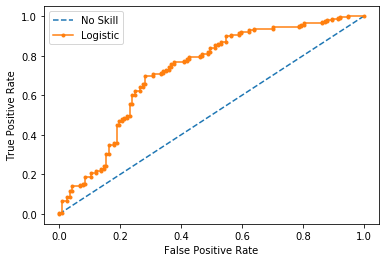

In [261]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [262]:
lr_auc = roc_auc_score(y_test, predict)
lr_auc

0.725332259363673

### Hyperparameter Tuning

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
c_space = np.logspace(-10,20,32)
param_grid = {'C': c_space}

In [265]:
c_space

array([1.00000000e-10, 9.28414545e-10, 8.61953566e-09, 8.00250228e-08,
       7.42963951e-07, 6.89778538e-06, 6.40400427e-05, 5.94557071e-04,
       5.51995432e-03, 5.12480588e-02, 4.75794431e-01, 4.41734470e+00,
       4.10112707e+01, 3.80754602e+02, 3.53498111e+03, 3.28192787e+04,
       3.04698957e+05, 2.82886943e+06, 2.62636353e+07, 2.43835410e+08,
       2.26380341e+09, 2.10174801e+10, 1.95129342e+11, 1.81160919e+12,
       1.68192432e+13, 1.56152301e+14, 1.44974067e+15, 1.34596032e+16,
       1.24960914e+17, 1.16015530e+18, 1.07710506e+19, 1.00000000e+20])

In [266]:
lr_cv = GridSearchCV(lr, param_grid, cv=10)

In [267]:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-10,...
       4.10112707e+01, 3.80754602e+02, 3.53498111e+03, 3.28192787e+04,
       3.04698957e+05, 2.82886943e+06, 2.62636353e+07, 2.43835410e+08,
       2.26380341e+09, 2.10174801e+10, 1.95129342e+11, 1.81160919e+12,
       1.68192432e+13, 1.56152301e+14, 1.44974067e+15, 1.34596032e+16,
       1.

In [268]:
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05124805876960947}
Best score is 0.7169405320813772


### Using new hyperparameter

In [271]:
lr = LogisticRegression(max_iter = 100000, C = 0.05124805876960947)

In [272]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.05124805876960947, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [273]:
# predict probabilities
predict = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
predict = predict[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predict)

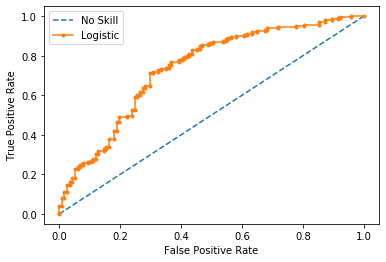

In [274]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [275]:
lr_auc = roc_auc_score(y_test, predict)
lr_auc

0.7379961516087171

### Feature Importance

In [276]:
from sklearn.datasets import make_classification

In [277]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.05124805876960947, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [278]:
# get importance
importance = lr.coef_[0]

In [279]:
importance

array([ 5.59951068e-01,  0.00000000e+00, -3.23887834e-02,  3.83893704e-02,
        5.42312278e-02,  6.42050918e-02, -9.31543456e-02,  1.00188761e-01,
        1.72042642e-01, -2.82367318e-01, -1.60844799e-02,  1.73181764e-02,
        3.38973698e-02,  1.86779308e-01, -1.06491548e-01,  2.10317159e-01,
       -1.15623042e-01, -2.18541024e-01,  2.74134910e-01,  1.17812051e-01,
       -7.65590714e-02, -1.30517760e-02, -1.73471314e-03,  1.88239671e-01,
       -1.00141319e-04, -1.85367974e-01,  7.09665356e-02, -2.00555059e-02,
        2.18098943e-02,  7.64384590e-02, -1.49298469e-01, -3.63415250e-02,
       -1.85715304e-01,  2.56364873e-02,  1.19459183e-02,  9.76904357e-02,
       -6.66040641e-02, -1.85849794e-02,  1.47867675e-02,  8.86966668e-02,
       -8.03387692e-02,  1.65244133e-02,  8.03048197e-02,  6.33966564e-02,
       -5.16574897e-02, -3.46007847e-02, -1.29087861e-02,  1.00613546e-01,
       -9.59058679e-03,  1.51107213e-01,  9.68164568e-03,  1.13270698e-01,
       -9.07631576e-02,  

In [280]:
feature_importance = pd.DataFrame({'features':X_train.columns, 'importance':importance})

In [281]:
feature_importance

,features,importance
0,download,0.559951
1,submitted_2011,0.000000
2,submitted_2012,-0.032389
3,submitted_2013,0.038389
4,submitted_2014,0.054231
...,...,...
85,abstract_lda_15,0.028748
86,abstract_lda_16,0.031024
87,abstract_lda_17,0.042644
88,abstract_lda_18,0.165894


In [282]:
# summarize feature importance
for i, v in sorted(enumerate(importance)):
	print('Feature: %0d, Column: %s, Score: %.5f' % (i,X_train.columns[i],v))

Feature: 0, Column: download, Score: 0.55995
Feature: 1, Column: submitted_2011, Score: 0.00000
Feature: 2, Column: submitted_2012, Score: -0.03239
Feature: 3, Column: submitted_2013, Score: 0.03839
Feature: 4, Column: submitted_2014, Score: 0.05423
Feature: 5, Column: submitted_2015, Score: 0.06421
Feature: 6, Column: submitted_2016, Score: -0.09315
Feature: 7, Column: submitted_2017, Score: 0.10019
Feature: 8, Column: submitted_2018, Score: 0.17204
Feature: 9, Column: submitted_2019, Score: -0.28237
Feature: 10, Column: submitted_2020, Score: -0.01608
Feature: 11, Column: published_2014, Score: 0.01732
Feature: 12, Column: published_2015, Score: 0.03390
Feature: 13, Column: published_2016, Score: 0.18678
Feature: 14, Column: published_2017, Score: -0.10649
Feature: 15, Column: published_2018, Score: 0.21032
Feature: 16, Column: published_2019, Score: -0.11562
Feature: 17, Column: published_2020, Score: -0.21854
Feature: 18, Column: length, Score: 0.27413
Feature: 19, Column: title_ld

In [283]:
fi_sorted = feature_importance.sort_values('importance')

In [284]:
fi_sorted.head(90)

,features,importance
9,submitted_2019,-0.282367
17,published_2020,-0.218541
67,keyword_lda_17,-0.196353
32,title_lda_2,-0.185715
25,introduction_NoW,-0.185368
...,...,...
13,published_2016,0.186779
23,keywords_NoW,0.188240
15,published_2018,0.210317
18,length,0.274135


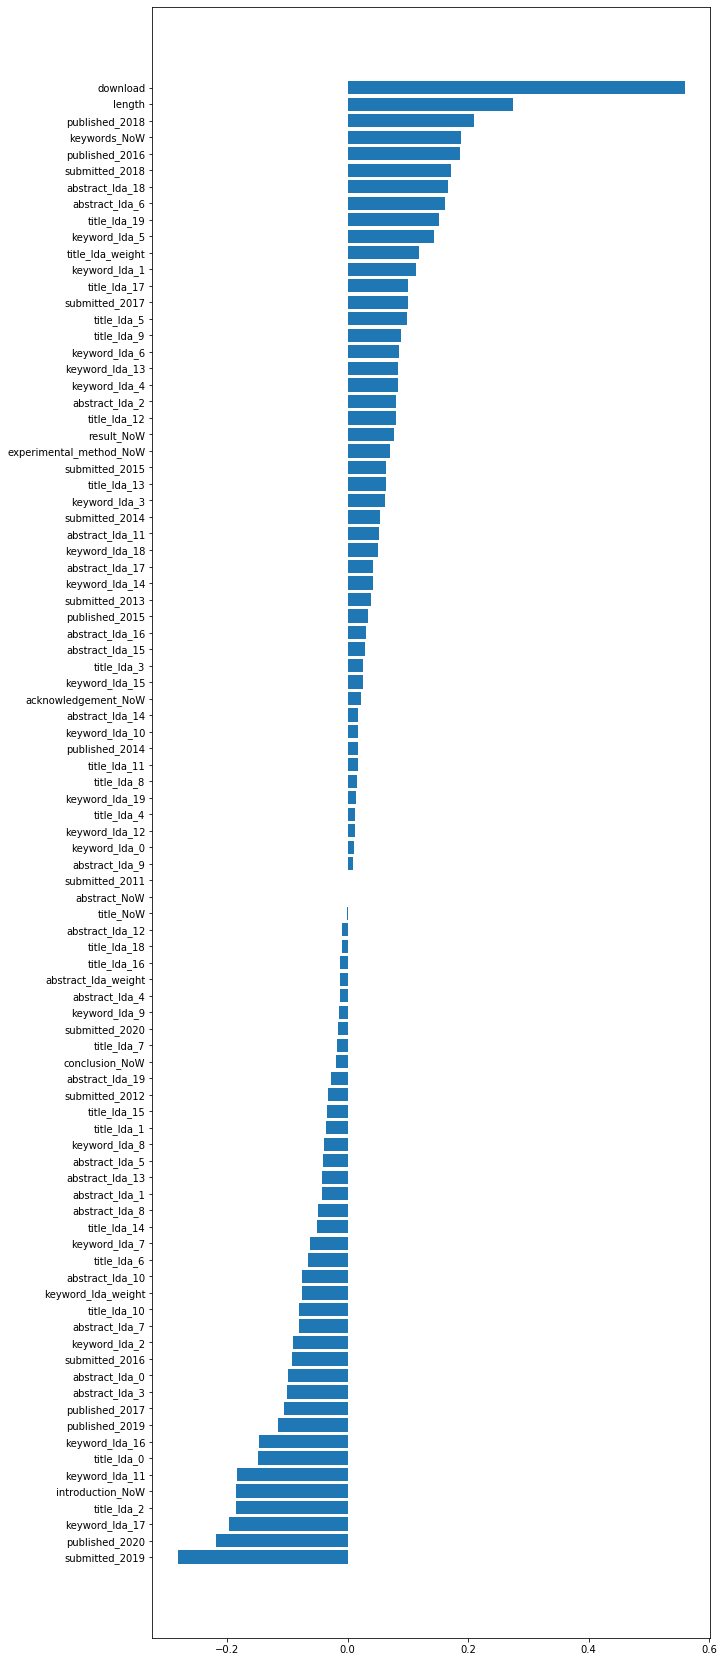

In [285]:
# plot feature importance
plt.figure(figsize=(10,30))
plt.barh(fi_sorted['features'], fi_sorted['importance'])
plt.show()

## Analyzing Data

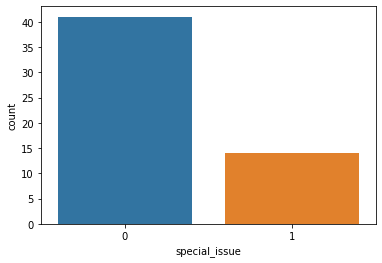

In [11]:
sns.countplot (x = "special_issue", data=issue_table)

special_issue_by_user_id


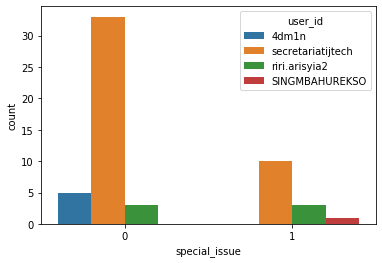

In [12]:
print("special_issue_by_user_id")
sns.countplot (x = "special_issue", hue="user_id", data=issue_table)

special_issue_by_year


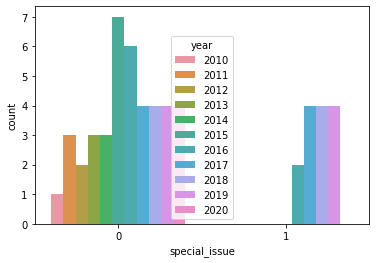

In [13]:
print("special_issue_by_year") 
sns.countplot (x = "special_issue", hue="year", data=issue_table)

### Journals per Issue ID

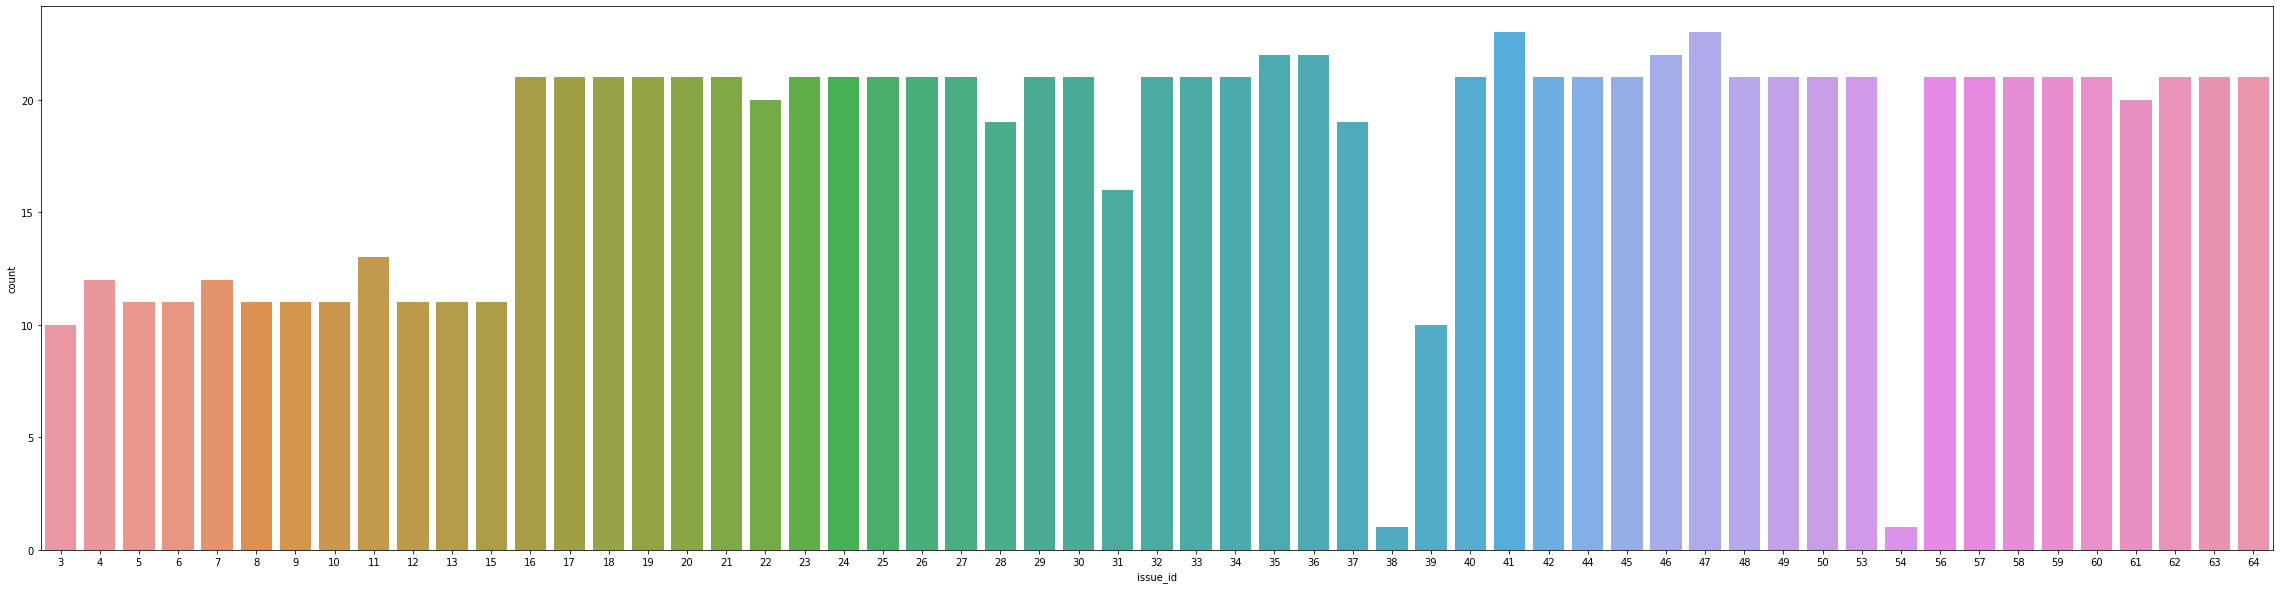

In [14]:
plt.figure(figsize=(40,10))
sns.countplot(x = "issue_id", data=journal_table)

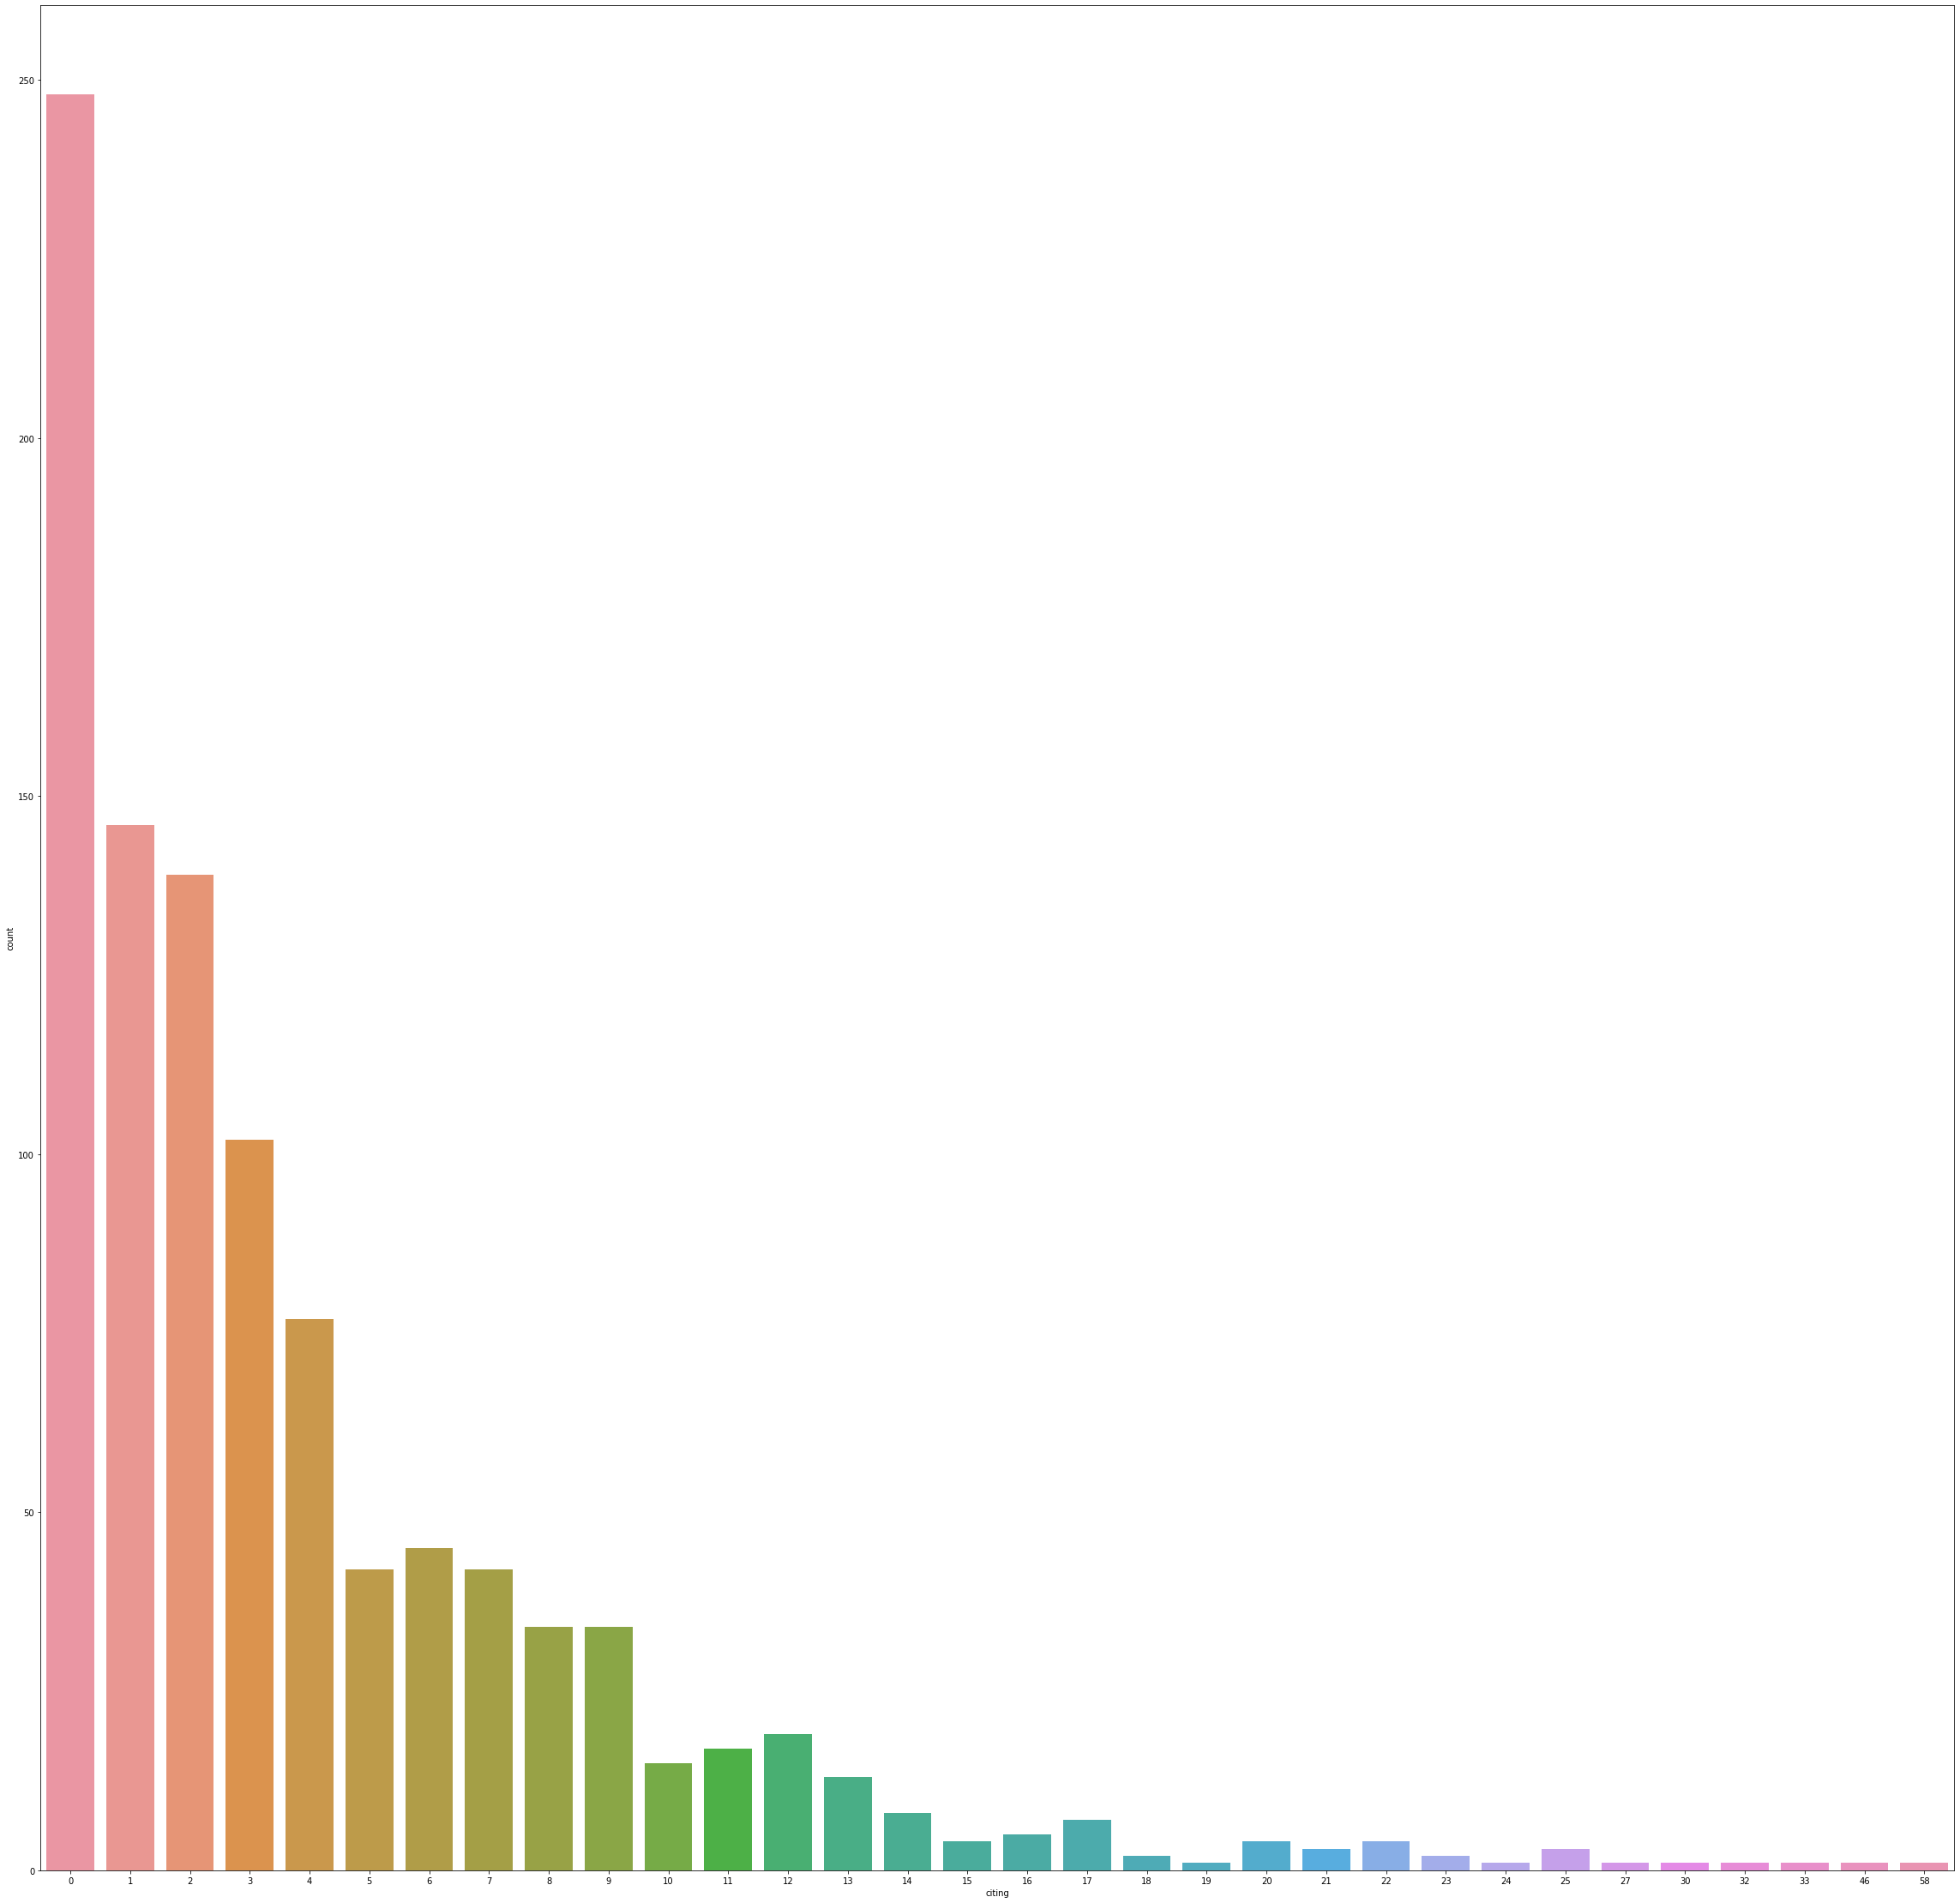

In [252]:
plt.figure(figsize=(40,40))
sns.countplot (x = "citing",data=journal_table)